In [1]:
from imblearn.metrics import geometric_mean_score
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
import time
from datetime import datetime, timedelta
from sklearn import svm
import pandas as pd

import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data
files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
  
prices=list()
sentiment=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    sentimentVector =  pd.read_csv('/home/andrea/Desktop/NLFF/intrinioDatasetUpdated/Sentiment/'+file+'.csv')
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDatasetUpdated/'+file+'.csv')
    #alignment of data
    maxdata=max(sentimentVector['initTime'])
    mindata=min(sentimentVector['initTime'])
    price['Unnamed: 0'] = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in price['Unnamed: 0']]
    price['Unnamed: 0'] = [row-timedelta(hours=8) for row in price['Unnamed: 0']]
    price=price[price['Unnamed: 0']>=mindata]
    price=price[price['Unnamed: 0']<=maxdata]
    print(sentimentVector[0:10])
    print(price[0:10])
    sentimentVector=sentimentVector.drop(['Unnamed: 0', 'initTime' ], axis=1)
    meanvector=np.concatenate((sentimentVector,pd.rolling_mean(sentimentVector,5)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,10)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,15)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,20)),axis=1)
    price=price.drop(['Unnamed: 0'],axis=1)
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    sentiment.append(meanvector)
    prices.append(price)

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00         0.000      0.000     0.000   
1           2  2017-08-14 14:00:00         0.000      0.000     0.000   
2           3  2017-08-14 14:15:00         0.000      0.000     1.000   
3           4  2017-08-14 14:30:00         0.000      0.000     1.000   
4           5  2017-08-14 14:45:00         0.250      0.250     1.250   
5           6  2017-08-14 15:00:00         1.125      0.625     1.125   
6           7  2017-08-14 15:15:00         1.125      1.625     3.125   
7           8  2017-08-14 15:30:00         1.125      1.625     3.125   
8           9  2017-08-14 15:45:00         1.125      1.625     4.125   
9          10  2017-08-14 16:00:00         1.125      1.625     4.125   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0        0.000          0.0         0.00         0  
1       0.0        0.000          0.0         0.00         0  
2      

/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=5,center=False).mean()
/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=15,center=False).mean()
/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=20,center=False).mean()


   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00      0.000000   0.000000  0.000000   
1           2  2017-08-14 14:00:00      0.000000   0.000000  0.333333   
2           3  2017-08-14 14:15:00      0.000000   0.250000  0.083333   
3           4  2017-08-14 14:30:00      0.000000   0.250000  2.083333   
4           5  2017-08-14 14:45:00      0.333333   0.208333  1.680556   
5           6  2017-08-14 15:00:00      0.333333   0.208333  1.680556   
6           7  2017-08-14 15:15:00      0.333333   0.208333  1.680556   
7           8  2017-08-14 15:30:00      0.333333   0.302083  1.920139   
8           9  2017-08-14 15:45:00      0.166667   0.651042  3.460069   
9          10  2017-08-14 16:00:00      0.166667   0.651042  3.460069   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0  0.000000     0.000000          0.0     0.000000         0  
1  0.333333     0.333333          0.0     0.000000         3  
2  0.58

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        1.0       2.0   
7           8  2017-08-14 15:30:00           0.0        1.0       2.0   
8           9  2017-08-14 15:45:00           0.0        1.0       5.0   
9          10  2017-08-14 16:00:00           0.0        1.0       5.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00      0.000000   0.000000  0.000000   
1           2  2017-08-14 14:00:00      0.000000   0.000000  0.000000   
2           3  2017-08-14 14:15:00      0.000000   0.000000  0.000000   
3           4  2017-08-14 14:30:00      0.000000   0.000000  0.000000   
4           5  2017-08-14 14:45:00      0.333333   0.333333  1.666667   
5           6  2017-08-14 15:00:00      0.333333   0.333333  1.666667   
6           7  2017-08-14 15:15:00      0.333333   0.333333  1.666667   
7           8  2017-08-14 15:30:00      0.333333   0.333333  1.666667   
8           9  2017-08-14 15:45:00      0.333333   0.333333  3.666667   
9          10  2017-08-14 16:00:00      0.333333   0.333333  3.666667   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0     0.000000          0.0          0.0         0  
1       0.0     0.000000          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       1.0   
2           3  2017-08-14 14:15:00           0.0        0.0       1.0   
3           4  2017-08-14 14:30:00           0.0        0.0       1.0   
4           5  2017-08-14 14:45:00           0.0        0.0       1.0   
5           6  2017-08-14 15:00:00           0.0        0.0       1.0   
6           7  2017-08-14 15:15:00           0.0        0.0       1.0   
7           8  2017-08-14 15:30:00           0.0        0.0       1.0   
8           9  2017-08-14 15:45:00           0.0        0.0       1.0   
9          10  2017-08-14 16:00:00           0.0        0.0       1.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         1  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0   0.000000       0.0   
1           2  2017-08-14 14:00:00           0.0   0.000000       0.0   
2           3  2017-08-14 14:15:00           0.0   0.000000       0.0   
3           4  2017-08-14 14:30:00           0.0   0.000000       0.0   
4           5  2017-08-14 14:45:00           0.0   0.000000       1.0   
5           6  2017-08-14 15:00:00           0.0   0.000000       1.0   
6           7  2017-08-14 15:15:00           0.0   0.000000       1.0   
7           8  2017-08-14 15:30:00           0.0   0.000000       1.0   
8           9  2017-08-14 15:45:00           0.0   0.333333       2.0   
9          10  2017-08-14 16:00:00           0.0   0.333333       2.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0  0.000000          0.0          0.0     0.000000         0  
1  0.000000          0.0          0.0     0.000000         0  
2  0.00

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        1.0       2.0   
7           8  2017-08-14 15:30:00           0.0        1.0       2.0   
8           9  2017-08-14 15:45:00           0.0        2.0       3.0   
9          10  2017-08-14 16:00:00           0.0        2.0       3.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u
def expercentage(y,prediction,percentage,t):
    tot=0
    falsetotpos=0
    falsetotneg=0
    for i in range(0,len(percentage)-1):
        if(prediction[i]==1):
            tot=tot+percentage[i]
        if(prediction[i]==0):
            tot=tot-percentage[i]
            
        falsetotpos=falsetotpos+percentage[i]
        falsetotneg=falsetotneg-percentage[i]
        i=i+t
    return tot,falsetotneg, falsetotpos

Working on... AAPL
4.883029404294328
0.0
Diff in tren train and test
0.5174870466321243
0.5284974093264249
F1,score 0.48468468468468473
G-score: 0.5051655647798122
Accuracy 0.5060449050086355
Window: 4
[[317 229]
 [343 269]]
Vol pos 0.3083263025078118
Vol neg 0.35563540216976464


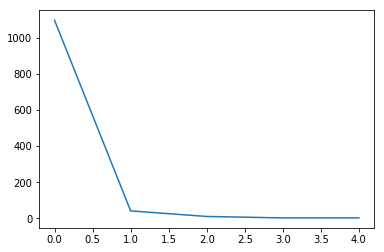

Real Percentage of gain: -1.9643338843922267
Percentage of gain: -0.01964096439682874
Total gain: -22.74423677152768
000000000000000000000000000000000000000000000000
Percentile:  0
[[304 221]
 [316 257]]
0.5109289617486339
Percentile:  1
[[12  6]
 [12 11]]
0.5609756097560976
Percentile:  2
[[1 2]
 [7 0]]
0.1
Percentile:  3
[[0 0]
 [2 0]]
0.0
Percentile:  4
[[0 0]
 [2 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AMZN
7.30254087059288
0.0006159569815638473
Diff in tren train and test
0.5246926892387319
0.5496117342536669
F1,score 0.5391014975041598
G-score: 0.5232638079604482
Accuracy 0.5220017256255393
Window: 4
[[281 241]
 [313 324]]
Vol pos 0.3893061979796918
Vol neg 0.3185807773196479


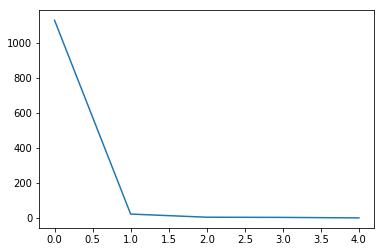

Real Percentage of gain: 4.4352329472035645
Percentage of gain: 0.05093744533445093
Total gain: 59.036499142628635
000000000000000000000000000000000000000000000000
Percentile:  0
[[275 229]
 [313 311]]
0.5195035460992907
Percentile:  1
[[ 5 11]
 [ 0  6]]
0.5
Percentile:  2
[[1 1]
 [0 2]]
0.75
Percentile:  3
[[3]]
1.0
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... PEP
2.357677710534418
0.0
Diff in tren train and test
0.4725598526703499
0.588495575221239
F1,score 0.5963541666666667
G-score: 0.5347325139643597
Accuracy 0.5427728613569321
Window: 4
[[139 140]
 [170 229]]
Vol pos 0.2977366315456734
Vol neg 0.25563002963608017


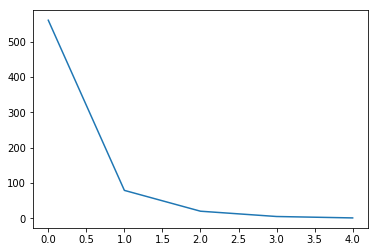

Real Percentage of gain: 4.105087840922581
Percentage of gain: 0.044722376433072204
Total gain: 30.321771221622953
000000000000000000000000000000000000000000000000
Percentile:  0
[[126 119]
 [142 174]]
0.5347593582887701
Percentile:  1
[[ 8 18]
 [14 39]]
0.5949367088607594
Percentile:  2
[[ 2  2]
 [ 4 12]]
0.7
Percentile:  3
[[2 1]
 [2 0]]
0.4
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
3.2472118959107856
0.0
Diff in tren train and test
0.5205094991364422
0.5250431778929189
F1,score 0.5365853658536586
G-score: 0.5241534528220368
Accuracy 0.5241796200345423
Window: 4
[[288 262]
 [289 319]]
Vol pos 0.40973924700888453
Vol neg 0.36719144979851465


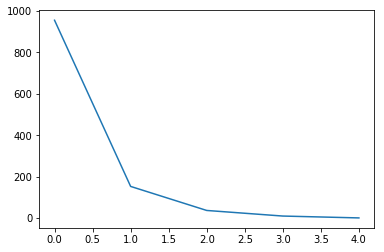

Real Percentage of gain: 2.485938335393558
Percentage of gain: 0.04005978764716004
Total gain: 46.389234095411325
000000000000000000000000000000000000000000000000
Percentile:  0
[[234 226]
 [242 253]]
0.5099476439790576
Percentile:  1
[[43 31]
 [30 49]]
0.6013071895424836
Percentile:  2
[[ 8  1]
 [15 13]]
0.5675675675675675
Percentile:  3
[[3 2]
 [2 3]]
0.6
Percentile:  4
[[0 1]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... MSFT
2.9815573770491772
0.0
Diff in tren train and test
0.5274179620034543
0.5375972342264477
F1,score 0.5417642466822795
G-score: 0.4822198521587732
Accuracy 0.49265341400172863
Window: 4
[[223 312]
 [275 347]]
Vol pos 0.38022589001200363
Vol neg 0.3535342808520941


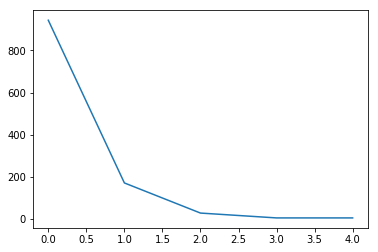

Real Percentage of gain: -2.850007489412728
Percentage of gain: 0.007955172382595388
Total gain: 9.204134446662863
000000000000000000000000000000000000000000000000
Percentile:  0
[[174 264]
 [214 291]]
0.4931071049840933
Percentile:  1
[[37 40]
 [49 45]]
0.47953216374269003
Percentile:  2
[[6 6]
 [8 8]]
0.5
Percentile:  3
[[4 0]
 [0 1]]
1.0
Percentile:  4
[[1 2]
 [1 1]]
0.4
000000000000000000000000000000000000000000000000
Working on... FB
8.273442632816934
0.0
Diff in tren train and test
0.5161707632600259
0.5366695427092321
F1,score 0.5802735781137509
G-score: 0.4568706291326438
Accuracy 0.4969801553062985
Window: 4
[[173 364]
 [219 403]]
Vol pos 0.43300156601558326
Vol neg 0.40843154952492267


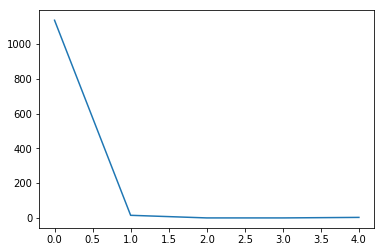

Real Percentage of gain: -0.1306130908223725
Percentage of gain: 0.0097440109162606
Total gain: 11.293308651946035
000000000000000000000000000000000000000000000000
Percentile:  0
[[169 361]
 [212 394]]
0.49559859154929575
Percentile:  1
[[4 3]
 [2 6]]
0.6666666666666666
Percentile:  2
Percentile:  3
Percentile:  4
[[0 0]
 [3 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... INTC
4.729266745218887
0.0
Diff in tren train and test
0.5316946959896507
0.5220017256255393
F1,score 0.5131690739167376
G-score: 0.5058596879848757
Accuracy 0.5056082830025884
Window: 4
[[284 270]
 [303 302]]
Vol pos 0.5043127088469981
Vol neg 0.5048636373016016


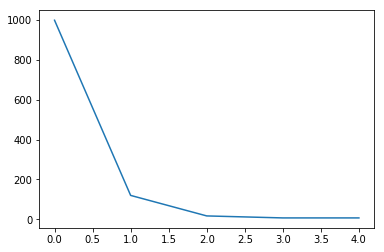

Real Percentage of gain: 3.7350279702260547
Percentage of gain: 0.005384282321417718
Total gain: 6.2403832105231345
000000000000000000000000000000000000000000000000
Percentile:  0
[[240 233]
 [262 264]]
0.5045045045045045
Percentile:  1
[[40 23]
 [31 26]]
0.55
Percentile:  2
[[2 6]
 [6 3]]
0.29411764705882354
Percentile:  3
[[0 6]
 [0 1]]
0.14285714285714285
Percentile:  4
[[1 2]
 [1 3]]
0.5714285714285714
000000000000000000000000000000000000000000000000
Working on... CSCO
4.705102717031152
0.0
Diff in tren train and test
0.5432661027976577
0.5329861111111112
F1,score 0.6282335550628233
G-score: 0.5368378777080719
Accuracy 0.5633680555555556
Window: 4
[[224 314]
 [189 425]]
Vol pos 0.37104555081656054
Vol neg 0.41063461582055666


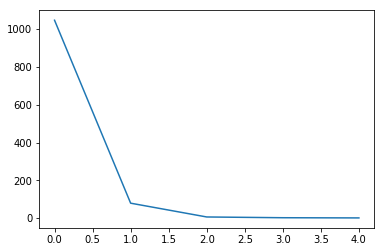

Real Percentage of gain: 10.986043002640526
Percentage of gain: 0.029739019724138702
Total gain: 34.259350722207785
000000000000000000000000000000000000000000000000
Percentile:  0
[[207 284]
 [168 388]]
0.5682903533906399
Percentile:  1
[[15 25]
 [15 24]]
0.4936708860759494
Percentile:  2
[[0 3]
 [2 1]]
0.16666666666666666
Percentile:  3
[[0 2]
 [0 0]]
0.0
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... CMCSA
4.475308641975317
0.0
Diff in tren train and test
0.49773560491697216
0.5090595340811044
F1,score 0.38095238095238093
G-score: 0.4429100504614203
Accuracy 0.4616048317515099
Window: 4
[[343 226]
 [398 192]]
Vol pos 0.5178030743730854
Vol neg 0.4860755452881307


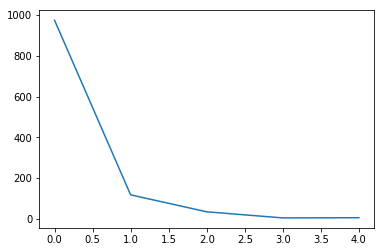

Real Percentage of gain: -6.79251162567714
Percentage of gain: -0.022680323960477002
Total gain: -26.286495470192847
000000000000000000000000000000000000000000000000
Percentile:  0
[[291 194]
 [343 146]]
0.4486652977412731
Percentile:  1
[[39 21]
 [32 26]]
0.5508474576271186
Percentile:  2
[[12  9]
 [ 4 10]]
0.6285714285714286
Percentile:  3
[[0 2]
 [2 1]]
0.2
Percentile:  4
[[1 0]
 [2 3]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... NVDA
3.9791051555757524
0.0
Diff in tren train and test
0.5204829667960328
0.546160483175151
F1,score 0.4949324324324324
G-score: 0.4856310874365164
Accuracy 0.4840379637618637
Window: 4
[[268 258]
 [340 293]]
Vol pos 0.5623293986999196
Vol neg 0.480164237668917


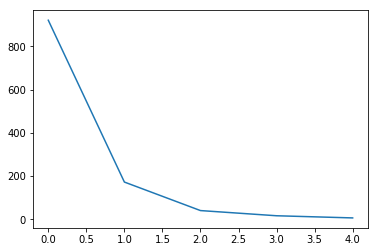

Real Percentage of gain: -0.04419971539934857
Percentage of gain: 0.024442259313755425
Total gain: 28.32857854464254
000000000000000000000000000000000000000000000000
Percentile:  0
[[216 208]
 [279 218]]
0.47122692725298587
Percentile:  1
[[37 34]
 [47 54]]
0.5290697674418605
Percentile:  2
[[ 6 12]
 [ 9 13]]
0.475
Percentile:  3
[[7 4]
 [2 3]]
0.625
Percentile:  4
[[1 0]
 [1 4]]
0.8333333333333334
000000000000000000000000000000000000000000000000
Working on... NFLX
4.082771472132831
0.00016525711528829872
Diff in tren train and test
0.516282078930343
0.542709232096635
F1,score 0.5467860048820179
G-score: 0.5177822990060513
Accuracy 0.5194132873166523
Window: 4
[[266 264]
 [293 336]]
Vol pos 0.5310394654515597
Vol neg 0.55513600695717


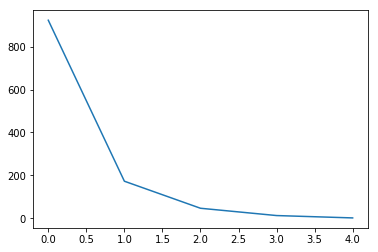

Real Percentage of gain: 10.166509048468727
Percentage of gain: 0.009037965769365984
Total gain: 10.475002326695176
000000000000000000000000000000000000000000000000
Percentile:  0
[[220 220]
 [224 258]]
0.5184381778741866
Percentile:  1
[[34 29]
 [51 59]]
0.5375722543352601
Percentile:  2
[[10  7]
 [14 16]]
0.5531914893617021
Percentile:  3
[[1 7]
 [3 2]]
0.23076923076923078
Percentile:  4
[[0 1]
 [1 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... BKNG
1.1369985598232721
0.000939946799010321
Diff in tren train and test
0.5096887844979449
0.548235294117647
F1,score 0.5333333333333333
G-score: 0.5048052358883152
Accuracy 0.5058823529411764
Window: 4
[[ 95  97]
 [113 120]]
Vol pos 0.26322595786927117
Vol neg 0.24838907969682342


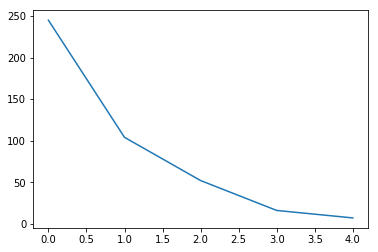

Real Percentage of gain: -1.6369648960501983
Percentage of gain: 0.010427939307200903
Total gain: 4.4318742055603835
000000000000000000000000000000000000000000000000
Percentile:  0
[[47 66]
 [58 74]]
0.49387755102040815
Percentile:  1
[[22 21]
 [28 33]]
0.5288461538461539
Percentile:  2
[[15  9]
 [17 10]]
0.49019607843137253
Percentile:  3
[[6 0]
 [8 2]]
0.5
Percentile:  4
[[4 0]
 [2 1]]
0.7142857142857143
000000000000000000000000000000000000000000000000
Working on... ADBE
3.3983248022335957
0.0
Diff in tren train and test
0.5433326129241409
0.5501730103806228
F1,score 0.4784853700516351
G-score: 0.4781637186655728
Accuracy 0.4757785467128028
Window: 4
[[272 248]
 [358 278]]
Vol pos 0.40979116376336433
Vol neg 0.44964712104587545


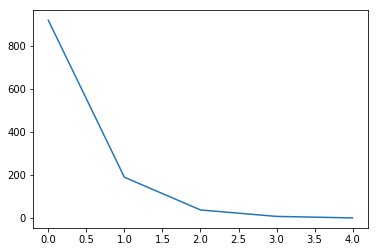

Real Percentage of gain: 2.1943677839729614
Percentage of gain: -0.04074482290999148
Total gain: -47.10101528395015
000000000000000000000000000000000000000000000000
Percentile:  0
[[219 197]
 [270 232]]
0.4912854030501089
Percentile:  1
[[42 42]
 [70 35]]
0.4074074074074074
Percentile:  2
[[ 7  7]
 [15  8]]
0.40540540540540543
Percentile:  3
[[3 2]
 [2 0]]
0.42857142857142855
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... AMGN
3.3162393162393125
0.0
Diff in tren train and test
0.5062988705473501
0.529105125977411
F1,score 0.5327999999999999
G-score: 0.4858718699567127
Accuracy 0.4926151172893136
Window: 4
[[234 308]
 [276 333]]
Vol pos 0.39434363535874506
Vol neg 0.4447622564556146


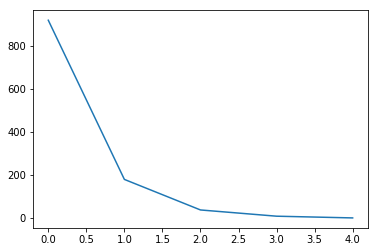

Real Percentage of gain: -2.2137972309966214
Percentage of gain: -0.03140600914132971
Total gain: -36.148316521670495
000000000000000000000000000000000000000000000000
Percentile:  0
[[200 244]
 [215 261]]
0.5010869565217392
Percentile:  1
[[30 43]
 [48 59]]
0.49444444444444446
Percentile:  2
[[ 3 17]
 [ 8 10]]
0.34210526315789475
Percentile:  3
[[1 2]
 [5 1]]
0.2222222222222222
Percentile:  4
[[0 1]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... TXN
3.62011743681389
0.0
Diff in tren train and test
0.5515530629853321
0.542709232096635
F1,score 0.5943190094683176
G-score: 0.4872677731113577
Accuracy 0.5194132873166523
Window: 4
[[194 336]
 [221 408]]
Vol pos 0.39906637051816024
Vol neg 0.43794776546573194


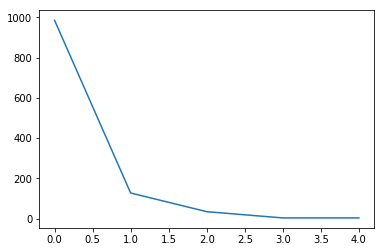

Real Percentage of gain: 2.5750690219648464
Percentage of gain: -0.003191501563831092
Total gain: -3.6989503124802354
000000000000000000000000000000000000000000000000
Percentile:  0
[[165 292]
 [174 355]]
0.5273833671399595
Percentile:  1
[[24 28]
 [31 44]]
0.5354330708661418
Percentile:  2
[[ 5 16]
 [ 6  7]]
0.35294117647058826
Percentile:  3
[[0 0]
 [3 0]]
0.0
Percentile:  4
[[0 0]
 [3 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AVGO
3.5186302609745104
0.0
Diff in tren train and test
0.5185185185185185
0.5355285961871751
F1,score 0.6338418862690707
G-score: 0.4828639913674457
Accuracy 0.5424610051993067
Window: 4
[[169 367]
 [161 457]]
Vol pos 0.43743371085246485
Vol neg 0.4542139933036225


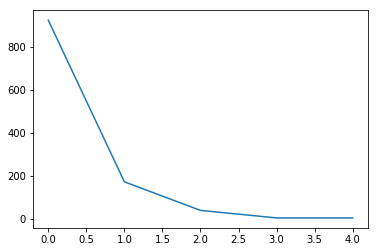

Real Percentage of gain: 2.9862337766705296
Percentage of gain: 0.02947011657654273
Total gain: 34.00851452933031
000000000000000000000000000000000000000000000000
Percentile:  0
[[139 300]
 [126 360]]
0.5394594594594595
Percentile:  1
[[23 51]
 [24 75]]
0.5664739884393064
Percentile:  2
[[ 7  8]
 [ 9 16]]
0.575
Percentile:  3
[[0 2]
 [2 1]]
0.2
Percentile:  4
[[0 5]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... PYPL
4.9430161675059505
0.0
Diff in tren train and test
0.533923941227312
0.5324114088159032
F1,score 0.5045045045045045
G-score: 0.47487716088453835
Accuracy 0.47709593777009507
Window: 4
[[244 297]
 [308 308]]
Vol pos 0.4746640761925653
Vol neg 0.5322106856242649


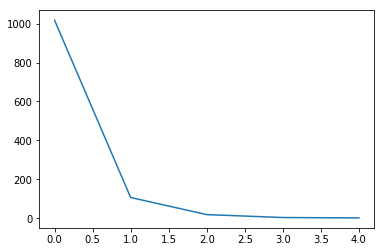

Real Percentage of gain: -2.659488651900406
Percentage of gain: -0.05183482691822319
Total gain: -59.97289474438423
000000000000000000000000000000000000000000000000
Percentile:  0
[[223 249]
 [278 267]]
0.48180924287118976
Percentile:  1
[[20 35]
 [20 32]]
0.48598130841121495
Percentile:  2
[[1 9]
 [5 4]]
0.2631578947368421
Percentile:  3
[[0 1]
 [2 1]]
0.25
Percentile:  4
[[0 2]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... GILD
7.47230206192292
0.0
Diff in tren train and test
0.5017301038062284
0.5242214532871973
F1,score 0.5448717948717948
G-score: 0.5029764393387159
Accuracy 0.5086505190311419
Window: 4
[[248 302]
 [266 340]]
Vol pos 0.4196390421243569
Vol neg 0.4000078041776851


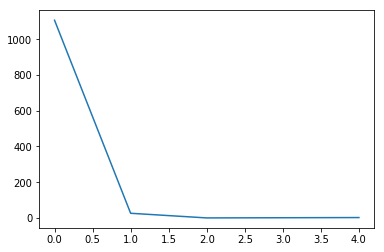

Real Percentage of gain: 6.628011758564865
Percentage of gain: 0.016905989616087115
Total gain: 19.543323996196705
000000000000000000000000000000000000000000000000
Percentile:  0
[[236 300]
 [248 323]]
0.5049683830171635
Percentile:  1
[[ 9  1]
 [12  4]]
0.5
Percentile:  2
Percentile:  3
[[0 1]
 [0 0]]
0.0
Percentile:  4
[[2]]
1.0
000000000000000000000000000000000000000000000000
Working on... COST
2.3891650603631978
0.0
Diff in tren train and test
0.52858380251191
0.5398613518197574
F1,score 0.2926829268292683
G-score: 0.4058142243457909
Accuracy 0.49740034662045063
Window: 4
[[454  77]
 [503 120]]
Vol pos 0.28295665295530603
Vol neg 0.3178486921068503


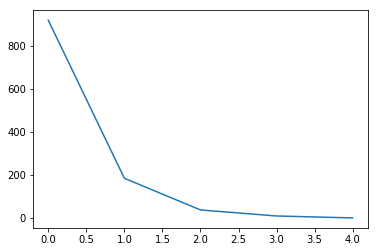

Real Percentage of gain: -9.01514862441338
Percentage of gain: -0.019007905221514285
Total gain: -21.935122625627486
000000000000000000000000000000000000000000000000
Percentile:  0
[[369  63]
 [384 102]]
0.5130718954248366
Percentile:  1
[[71 11]
 [87 15]]
0.4673913043478261
Percentile:  2
[[10  2]
 [24  1]]
0.2972972972972973
Percentile:  3
[[4 1]
 [4 0]]
0.4444444444444444
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... QCOM
4.165966739459091
0.0
Diff in tren train and test
0.5101380500431406
0.5254529767040552
F1,score 0.5064157399486742
G-score: 0.5027347216260354
Accuracy 0.5021570319240725
Window: 4
[[286 264]
 [313 296]]
Vol pos 0.4629226562293215
Vol neg 0.4400742878277013


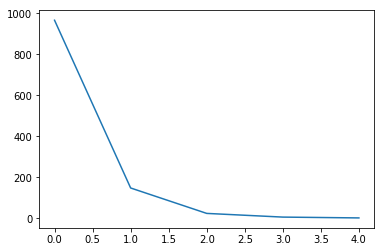

Real Percentage of gain: 0.343561973525876
Percentage of gain: 0.013371977436480978
Total gain: 15.498121848881453
000000000000000000000000000000000000000000000000
Percentile:  0
[[244 225]
 [257 240]]
0.5010351966873706
Percentile:  1
[[38 35]
 [42 33]]
0.4797297297297297
Percentile:  2
[[ 4  4]
 [11  5]]
0.375
Percentile:  3
[[6]]
1.0
Percentile:  4
[[2]]
1.0
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.5070059623763429
Mean gain over portfolio :  4.557153260623808
Real mean gain over portfolio 1.1667009125244834


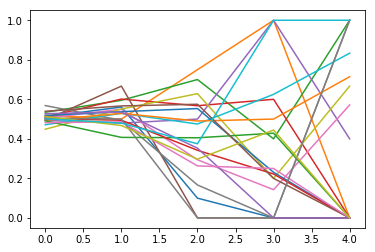

In [3]:
import warnings
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    #senttemp=normalize(senttemp,axis=0,norm='max')
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[4]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        yprice=[]
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(senttemp[i])
        y=np.array(y)
        
        x=np.array(x)
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

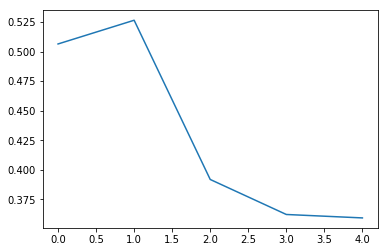

In [4]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
6.2151820652697705
0.0025906064609701575
Diff in tren train and test
0.5259050509429872
0.5602775368603643
F1,score 0.5655799848369977
G-score: 0.4855336676882739
Accuracy 0.5030355594102341
Window: 28
[[207 300]
 [273 373]]
Vol pos 0.9224756979015739
Vol neg 1.0282757312091897


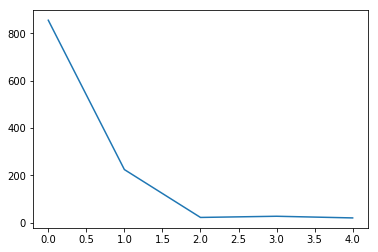

Real Percentage of gain: 10.090894568930896
Percentage of gain: -0.046978394796142936
Total gain: -54.16608919995281
000000000000000000000000000000000000000000000000
Percentile:  0
[[168 235]
 [184 267]]
0.509367681498829
Percentile:  1
[[35 64]
 [51 75]]
0.4888888888888889
Percentile:  2
[[ 3  1]
 [ 9 10]]
0.5652173913043478
Percentile:  3
[[ 0  0]
 [12 16]]
0.5714285714285714
Percentile:  4
[[ 0  0]
 [16  5]]
0.23809523809523808
000000000000000000000000000000000000000000000000
Working on... AMZN
12.157084770188899
0.000917344130579077
Diff in tren train and test
0.5682113469034213
0.6377816291161178
F1,score 0.4469565217391305
G-score: 0.46693858970650975
Accuracy 0.4488734835355286
Window: 28
[[261 157]
 [479 257]]
Vol pos 1.004199711694152
Vol neg 1.0547862434158533


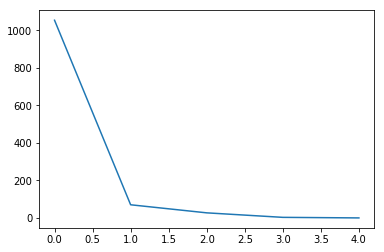

Real Percentage of gain: -24.302965027282102
Percentage of gain: -0.13056204519489778
Total gain: -150.66860015491204
000000000000000000000000000000000000000000000000
Percentile:  0
[[247 137]
 [444 224]]
0.44771863117870725
Percentile:  1
[[12 14]
 [21 23]]
0.5
Percentile:  2
[[ 2  5]
 [13  7]]
0.3333333333333333
Percentile:  3
[[0 0]
 [1 2]]
0.6666666666666666
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... PEP
2.3687214611872096
0.0
Diff in tren train and test
0.44881305637982194
0.75037147102526
F1,score 0.5948717948717949
G-score: 0.5846536549747567
Accuracy 0.5304606240713224
Window: 28
[[125  43]
 [273 232]]
Vol pos 0.7690394508574069
Vol neg 0.6461224306307923


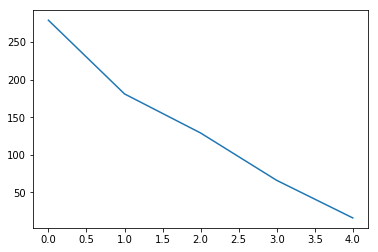

Real Percentage of gain: 9.51287600818385
Percentage of gain: 0.10456522418538466
Total gain: 70.37239587676387
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 73  23]
 [119  64]]
0.4910394265232975
Percentile:  1
[[21 11]
 [84 65]]
0.47513812154696133
Percentile:  2
[[11  7]
 [37 74]]
0.6589147286821705
Percentile:  3
[[12  2]
 [26 26]]
0.5757575757575758
Percentile:  4
[[8 0]
 [6 2]]
0.625
000000000000000000000000000000000000000000000000
Working on... GOOGL
5.878547598584186
0.00042690345577337966
Diff in tren train and test
0.5547366139171905
0.562012142237641
F1,score 0.5405405405405405
G-score: 0.5316070337962204
Accuracy 0.5281873373807459
Window: 28
[[289 216]
 [328 320]]
Vol pos 1.2488116563272473
Vol neg 1.1646244145018219


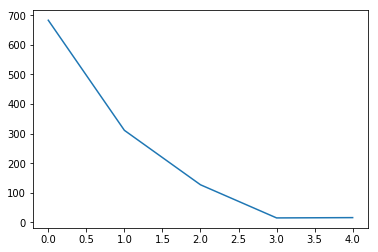

Real Percentage of gain: 3.745488641445848
Percentage of gain: 0.11012195768803337
Total gain: 126.97061721430246
000000000000000000000000000000000000000000000000
Percentile:  0
[[194 137]
 [173 178]]
0.5454545454545454
Percentile:  1
[[59 66]
 [95 92]]
0.483974358974359
Percentile:  2
[[14  9]
 [57 46]]
0.47619047619047616
Percentile:  3
[[6 2]
 [3 4]]
0.6666666666666666
Percentile:  4
[[15  1]
 [ 0  0]]
0.9375
000000000000000000000000000000000000000000000000
Working on... MSFT
6.174452793204837
0.0
Diff in tren train and test
0.5552905464006939
0.5897658282740676
F1,score 0.6039676708302718
G-score: 0.5093119934073109
Accuracy 0.5325238508239376
Window: 28
[[203 270]
 [269 411]]
Vol pos 0.8514034117490802
Vol neg 0.8341927211817751


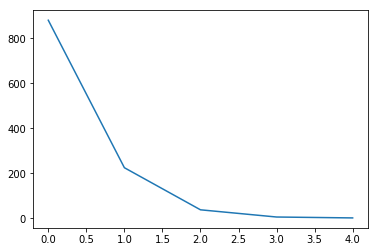

Real Percentage of gain: 9.919304982502078
Percentage of gain: 0.06342742246050169
Total gain: 73.13181809695845
000000000000000000000000000000000000000000000000
Percentile:  0
[[148 214]
 [205 313]]
0.5238636363636363
Percentile:  1
[[47 46]
 [49 83]]
0.5777777777777777
Percentile:  2
[[ 4  7]
 [14 13]]
0.4473684210526316
Percentile:  3
[[3 2]
 [1 0]]
0.5
Percentile:  4
[[1 1]
 [0 0]]
0.5
000000000000000000000000000000000000000000000000
Working on... FB
10.887151375939736
0.0
Diff in tren train and test
0.5323663130547738
0.58578856152513
F1,score 0.6444595513256288
G-score: 0.4799010506809743
Accuracy 0.5467937608318891
Window: 28
[[157 321]
 [202 474]]
Vol pos 1.3898666404839615
Vol neg 1.178523776495466


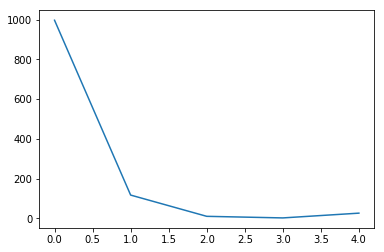

Real Percentage of gain: 15.713047374826141
Percentage of gain: 0.22585607888929896
Total gain: 260.637915038251
000000000000000000000000000000000000000000000000
Percentile:  0
[[131 312]
 [168 386]]
0.518555667001003
Percentile:  1
[[17  8]
 [18 74]]
0.7777777777777778
Percentile:  2
[[9 1]
 [0 0]]
0.9
Percentile:  3
[[0 0]
 [1 1]]
0.5
Percentile:  4
[[ 0  0]
 [15 11]]
0.4230769230769231
000000000000000000000000000000000000000000000000
Working on... INTC
8.395303326810174
0.0
Diff in tren train and test
0.5555315003247456
0.5433275563258232
F1,score 0.5267702936096718
G-score: 0.527101302577443
Accuracy 0.5251299826689775
Window: 28
[[301 226]
 [322 305]]
Vol pos 1.2311454629770202
Vol neg 1.2058636789517205


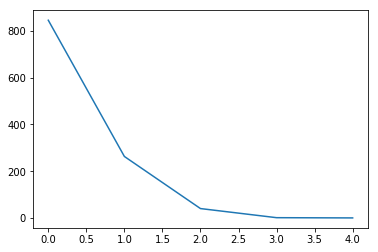

Real Percentage of gain: 24.55735648120811
Percentage of gain: 0.07388288951345869
Total gain: 85.26085449853133
000000000000000000000000000000000000000000000000
Percentile:  0
[[232 145]
 [258 211]]
0.5236406619385343
Percentile:  1
[[62 53]
 [61 87]]
0.5665399239543726
Percentile:  2
[[ 6 28]
 [ 1  5]]
0.275
Percentile:  3
[[1]]
1.0
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... CSCO
5.061619718309853
0.0
Diff in tren train and test
0.5903745644599303
0.5213600697471665
F1,score 0.5694682675814751
G-score: 0.562606112639798
Accuracy 0.5623365300784655
Window: 28
[[313 236]
 [266 332]]
Vol pos 1.0265134228318988
Vol neg 0.8333677772245136


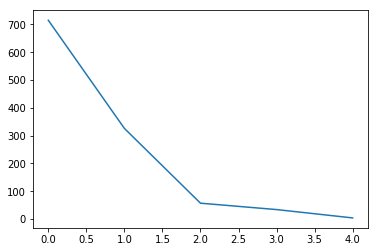

Real Percentage of gain: 25.404375707280266
Percentage of gain: 0.21251136317338185
Total gain: 243.75053355986896
000000000000000000000000000000000000000000000000
Percentile:  0
[[163 160]
 [185 207]]
0.5174825174825175
Percentile:  1
[[113  57]
 [ 60  96]]
0.6411042944785276
Percentile:  2
[[19  8]
 [ 7 23]]
0.7368421052631579
Percentile:  3
[[13 11]
 [ 7  3]]
0.47058823529411764
Percentile:  4
[[4]]
1.0
000000000000000000000000000000000000000000000000
Working on... CMCSA
8.98261429491308
0.0
Diff in tren train and test
0.4686011260285838
0.5051993067590987
F1,score 0.4270734032411821
G-score: 0.47051083257025084
Accuracy 0.47920277296360486
Window: 28
[[329 242]
 [359 224]]
Vol pos 1.3941447822760753
Vol neg 1.5061270050580384


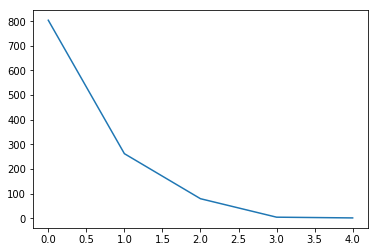

Real Percentage of gain: -7.386547773143448
Percentage of gain: -0.11630872221942071
Total gain: -134.2202654412115
000000000000000000000000000000000000000000000000
Percentile:  0
[[220 171]
 [250 163]]
0.4763681592039801
Percentile:  1
[[98 42]
 [75 47]]
0.5534351145038168
Percentile:  2
[[10 28]
 [31 10]]
0.25316455696202533
Percentile:  3
[[1 1]
 [2 0]]
0.25
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... NVDA
7.248431726389965
0.007644967700004514
Diff in tren train and test
0.5743667460489283
0.5805892547660312
F1,score 0.30385015608740895
G-score: 0.39067551634624686
Accuracy 0.4202772963604853
Window: 28
[[339 145]
 [524 146]]
Vol pos 1.5607898280628565
Vol neg 1.3473116203165951


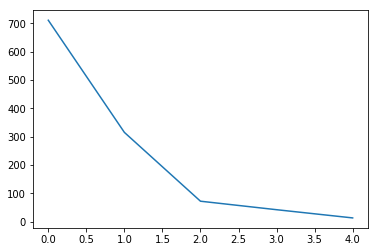

Real Percentage of gain: -88.70691084575883
Percentage of gain: -0.12510260604966797
Total gain: -144.36840738131684
000000000000000000000000000000000000000000000000
Percentile:  0
[[204 113]
 [323  72]]
0.38764044943820225
Percentile:  1
[[ 90  31]
 [150  42]]
0.4217252396166134
Percentile:  2
[[21  1]
 [29 22]]
0.589041095890411
Percentile:  3
[[21  0]
 [10 10]]
0.7560975609756098
Percentile:  4
[[ 3  0]
 [10  0]]
0.23076923076923078
000000000000000000000000000000000000000000000000
Working on... NFLX
7.410943467100719
0.001406110187899634
Diff in tren train and test
0.56691208315288
0.610051993067591
F1,score 0.628169014084507
G-score: 0.5033975475795357
Accuracy 0.5424610051993067
Window: 28
[[180 270]
 [258 446]]
Vol pos 1.5610541001800806
Vol neg 1.621773764844126


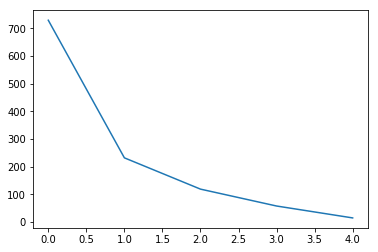

Real Percentage of gain: 17.886938166806477
Percentage of gain: 0.10478623819326854
Total gain: 120.9233188750319
000000000000000000000000000000000000000000000000
Percentile:  0
[[147 203]
 [131 247]]
0.5412087912087912
Percentile:  1
[[ 21  42]
 [ 61 108]]
0.5560344827586207
Percentile:  2
[[ 7  8]
 [37 67]]
0.6218487394957983
Percentile:  3
[[ 4  7]
 [26 21]]
0.43103448275862066
Percentile:  4
[[1 9]
 [3 2]]
0.2
000000000000000000000000000000000000000000000000
Working on... BKNG
2.5815320081626525
0.0014318988888343074
Diff in tren train and test
0.5552256532066508
0.6166666666666667
F1,score 0.7533333333333334
G-score: 0.49931005900624587
Accuracy 0.6476190476190476
Window: 28
[[ 46 115]
 [ 33 226]]
Vol pos 0.5243873082808101
Vol neg 0.6028156114093227


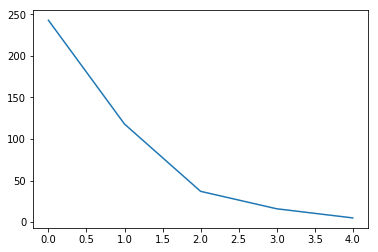

Real Percentage of gain: 28.32676192071293
Percentage of gain: 0.12718246991381094
Total gain: 53.41663736380059
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 28  65]
 [ 17 132]]
0.6611570247933884
Percentile:  1
[[17 29]
 [10 62]]
0.6694915254237288
Percentile:  2
[[ 1  7]
 [ 6 23]]
0.6486486486486487
Percentile:  3
[[0 9]
 [0 7]]
0.4375
Percentile:  4
[[0 4]
 [0 2]]
0.3333333333333333
000000000000000000000000000000000000000000000000
Working on... ADBE
5.959915611814346
0.0
Diff in tren train and test
0.5740017361111112
0.6611642050390965
F1,score 0.599406528189911
G-score: 0.5308248227229789
Accuracy 0.5308427454387489
Window: 28
[[207 183]
 [357 404]]
Vol pos 1.1107798463927412
Vol neg 1.1236505354332211


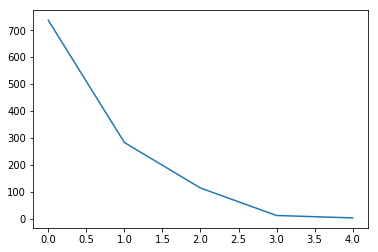

Real Percentage of gain: 32.54926409759269
Percentage of gain: 0.06248062294702475
Total gain: 71.91519701202549
000000000000000000000000000000000000000000000000
Percentile:  0
[[127 102]
 [261 247]]
0.5074626865671642
Percentile:  1
[[ 64  40]
 [ 65 114]]
0.6289752650176679
Percentile:  2
[[15 30]
 [30 39]]
0.47368421052631576
Percentile:  3
[[1 7]
 [0 4]]
0.4166666666666667
Percentile:  4
[[0 3]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AMGN
5.291005291005295
0.0
Diff in tren train and test
0.5079607415485278
0.6003490401396161
F1,score 0.5471264367816092
G-score: 0.47363059110825323
Accuracy 0.48429319371727747
Window: 28
[[198 260]
 [331 357]]
Vol pos 1.1053793183857683
Vol neg 0.9823503703724954


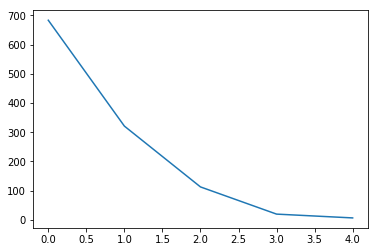

Real Percentage of gain: -7.444252754421672
Percentage of gain: 0.02872290821462186
Total gain: 32.91645281395665
000000000000000000000000000000000000000000000000
Percentile:  0
[[108 175]
 [195 205]]
0.4582723279648609
Percentile:  1
[[ 50  55]
 [ 96 120]]
0.5295950155763239
Percentile:  2
[[19 24]
 [39 31]]
0.4424778761061947
Percentile:  3
[[13  6]
 [ 1  0]]
0.65
Percentile:  4
[[7]]
1.0
000000000000000000000000000000000000000000000000
Working on... TXN
5.987780040733193
0.0
Diff in tren train and test
0.6268139484513754
0.5901213171577123
F1,score 0.6257505003335557
G-score: 0.4249062679867549
Accuracy 0.5138648180242634
Window: 28
[[124 349]
 [212 469]]
Vol pos 0.9961788598022628
Vol neg 0.8975691255970287


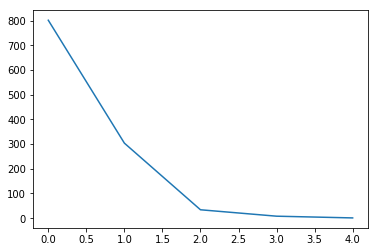

Real Percentage of gain: 9.416892667790451
Percentage of gain: 0.07556133830399375
Total gain: 87.1977844028088
000000000000000000000000000000000000000000000000
Percentile:  0
[[103 273]
 [133 293]]
0.4937655860349127
Percentile:  1
[[ 21  75]
 [ 70 138]]
0.5230263157894737
Percentile:  2
[[ 0  1]
 [ 8 25]]
0.7352941176470589
Percentile:  3
[[8]]
1.0
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... AVGO
5.610368642927625
0.0
Diff in tren train and test
0.48368856024358414
0.6127067014795474
F1,score 0.3632850241545894
G-score: 0.42571216544031426
Accuracy 0.42645778938207135
Window: 28
[[302 143]
 [516 188]]
Vol pos 1.202895562677048
Vol neg 1.2435537561409926


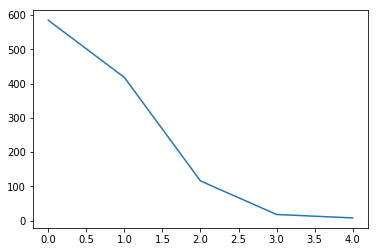

Real Percentage of gain: -23.52213605496848
Percentage of gain: -0.20024638780257673
Total gain: -230.08309958516065
000000000000000000000000000000000000000000000000
Percentile:  0
[[124  73]
 [263 125]]
0.4256410256410256
Percentile:  1
[[136  58]
 [172  52]]
0.44976076555023925
Percentile:  2
[[32 10]
 [64 10]]
0.3620689655172414
Percentile:  3
[[8 2]
 [8 0]]
0.4444444444444444
Percentile:  4
[[2 0]
 [6 0]]
0.25
000000000000000000000000000000000000000000000000
Working on... PYPL
6.66413758219524
0.0
Diff in tren train and test
0.5868952050336299
0.6302083333333334
F1,score 0.6455097906819716
G-score: 0.4798814612400803
Accuracy 0.5442708333333334
Window: 28
[[149 277]
 [248 478]]
Vol pos 1.255853351433144
Vol neg 1.472033206798546


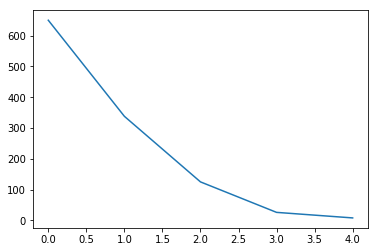

Real Percentage of gain: -4.00950232430958
Percentage of gain: 0.012675883489014458
Total gain: 14.602617779344655
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 96 142]
 [152 260]]
0.5476923076923077
Percentile:  1
[[ 33  71]
 [ 64 170]]
0.6005917159763313
Percentile:  2
[[18 39]
 [28 40]]
0.464
Percentile:  3
[[ 1 17]
 [ 2  6]]
0.2692307692307692
Percentile:  4
[[1 7]
 [0 0]]
0.125
000000000000000000000000000000000000000000000000
Working on... GILD
7.934752557367997
0.0
Diff in tren train and test
0.4751357220412595
0.5360556038227628
F1,score 0.5111308993766696
G-score: 0.5238211319683258
Accuracy 0.5230234578627281
Window: 28
[[315 219]
 [330 287]]
Vol pos 1.1091399301795934
Vol neg 0.993862860908917


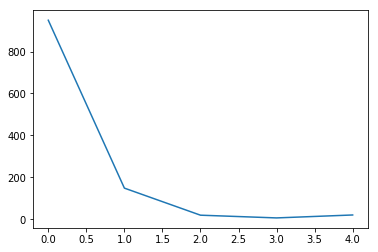

Real Percentage of gain: 1.648424407263917
Percentage of gain: 0.10605693078116404
Total gain: 122.0715273291198
000000000000000000000000000000000000000000000000
Percentile:  0
[[265 176]
 [307 201]]
0.4910432033719705
Percentile:  1
[[27 21]
 [20 81]]
0.7248322147651006
Percentile:  2
[[10  6]
 [ 1  3]]
0.65
Percentile:  3
[[4 3]
 [0 0]]
0.5714285714285714
Percentile:  4
[[ 9 12]
 [ 0  0]]
0.42857142857142855
000000000000000000000000000000000000000000000000
Working on... COST
2.7652341569841132
0.0027343749999936273
Diff in tren train and test
0.5562078712763644
0.577023498694517
F1,score 0.49747048903878577
G-score: 0.4860108469942681
Accuracy 0.48128807658833767
Window: 28
[[258 228]
 [368 295]]
Vol pos 0.7095466211971185
Vol neg 0.7060694753405599


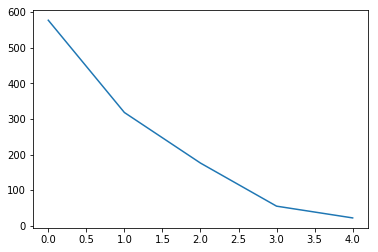

Real Percentage of gain: -20.21473906462641
Percentage of gain: -0.02475032705045008
Total gain: -28.43812578096714
000000000000000000000000000000000000000000000000
Percentile:  0
[[144 122]
 [167 146]]
0.5008635578583766
Percentile:  1
[[ 69  62]
 [117  68]]
0.43354430379746833
Percentile:  2
[[40 34]
 [61 41]]
0.4602272727272727
Percentile:  3
[[ 5  8]
 [22 19]]
0.4444444444444444
Percentile:  4
[[ 0  2]
 [ 1 19]]
0.8636363636363636
000000000000000000000000000000000000000000000000
Working on... QCOM
6.459999999999993
0.0
Diff in tren train and test
0.5057396577864414
0.5771230502599654
F1,score 0.5318818040435459
G-score: 0.4700842221317459
Accuracy 0.4783362218370884
Window: 28
[[210 278]
 [324 342]]
Vol pos 1.1123133115111887
Vol neg 1.3825336857193533


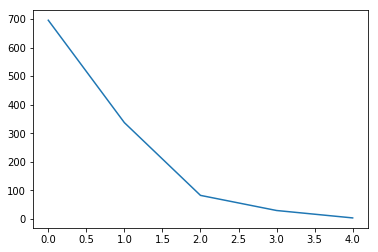

Real Percentage of gain: -28.760379061371808
Percentage of gain: -0.18915799900249086
Total gain: -218.28833084887447
000000000000000000000000000000000000000000000000
Percentile:  0
[[138 169]
 [170 219]]
0.5129310344827587
Percentile:  1
[[70 87]
 [96 84]]
0.456973293768546
Percentile:  2
[[ 2 22]
 [32 26]]
0.34146341463414637
Percentile:  3
[[ 0  0]
 [21  8]]
0.27586206896551724
Percentile:  4
[[0 0]
 [2 1]]
0.3333333333333333
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.5124639193563698
Mean gain over portfolio :  20.14673757341843
Real mean gain over portfolio -0.7787903940669336


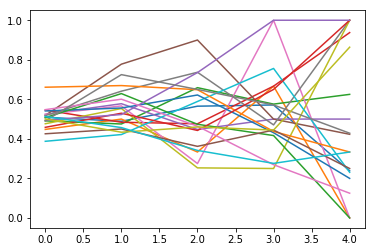

In [5]:
import warnings
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    #senttemp=normalize(senttemp,axis=0,norm='max')
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[28]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        yprice=[]
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(senttemp[i])
        y=np.array(y)
        
        x=np.array(x)
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()

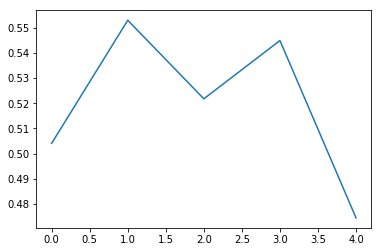

In [6]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5490716180371353
0.552212389380531
F1,score 0.5743834526650756
G-score: 0.5172422311564472
Accuracy 0.5265486725663717
Window: 140
[[234 272]
 [263 361]]
Vol pos 2.9264533689339225
Vol neg 3.4495302197876345


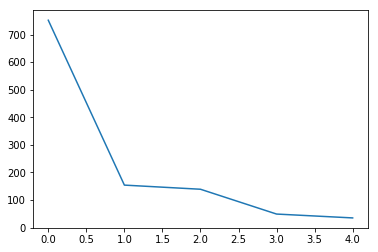

Real Percentage of gain: 36.80123654188215
Percentage of gain: -0.09226452484132797
Total gain: -104.2589130707006
000000000000000000000000000000000000000000000000
Percentile:  0
[[183 195]
 [144 231]]
0.549800796812749
Percentile:  1
[[31 37]
 [40 44]]
0.4934210526315789
Percentile:  2
[[20 40]
 [31 48]]
0.4892086330935252
Percentile:  3
[[ 0  0]
 [34 15]]
0.30612244897959184
Percentile:  4
[[ 0  0]
 [13 22]]
0.6285714285714286
000000000000000000000000000000000000000000000000
Working on... AMZN
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.6817579505300353
0.7782685512367491
F1,score 0.6436931079323798
G-score: 0.4463471723697441
Accuracy 0.5159010600706714
Window: 140
[[ 89 162]
 [386 495]]
Vol pos 2.325634255874898
Vol neg 2.402701283884938


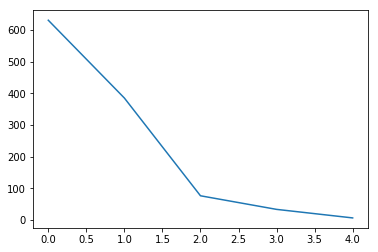

Real Percentage of gain: 26.67166924578173
Percentage of gain: 0.036652033446991514
Total gain: 41.49010186199439
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 84 115]
 [205 226]]
0.49206349206349204
Percentile:  1
[[  2  34]
 [134 215]]
0.5636363636363636
Percentile:  2
[[ 3 13]
 [19 41]]
0.5789473684210527
Percentile:  3
[[ 0  0]
 [21 12]]
0.36363636363636365
Percentile:  4
[[0 0]
 [6 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... PEP
5.495274763738178
0.0
Diff in tren train and test
0.3288564850345357
0.8602150537634409
F1,score 0.7162891046386191
G-score: 0.6040158647214201
Accuracy 0.5960061443932412
Window: 140
[[ 56  35]
 [228 332]]
Vol pos 1.9893923993128393
Vol neg 2.219572743488264


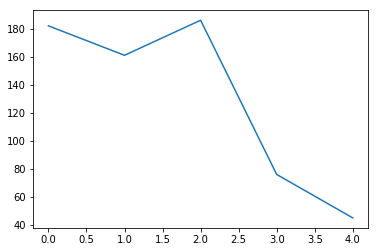

Real Percentage of gain: 77.55244246800014
Percentage of gain: 0.28899634315816924
Total gain: 188.13661939596818
000000000000000000000000000000000000000000000000
Percentile:  0
[[37 35]
 [38 72]]
0.5989010989010989
Percentile:  1
[[ 19   0]
 [ 32 110]]
0.8012422360248447
Percentile:  2
[[  0   0]
 [105  81]]
0.43548387096774194
Percentile:  3
[[ 0  0]
 [40 36]]
0.47368421052631576
Percentile:  4
[[ 0  0]
 [12 33]]
0.7333333333333333
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6279840848806366
0.5973451327433629
F1,score 0.5284178187403994
G-score: 0.4389204946812129
Accuracy 0.45663716814159294
Window: 140
[[172 283]
 [331 344]]
Vol pos 2.615266744144972
Vol neg 3.241046657165528


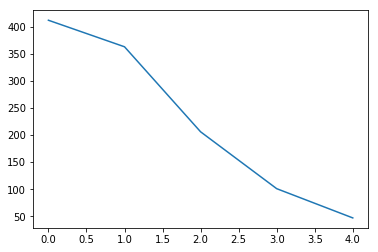

Real Percentage of gain: -26.759351743908717
Percentage of gain: -0.5668362898414415
Total gain: -640.5250075208289
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 83 149]
 [ 58 121]]
0.49635036496350365
Percentile:  1
[[ 43  68]
 [ 93 159]]
0.5564738292011019
Percentile:  2
[[44 53]
 [89 20]]
0.3106796116504854
Percentile:  3
[[ 1 13]
 [64 23]]
0.2376237623762376
Percentile:  4
[[ 0  0]
 [26 21]]
0.44680851063829785
000000000000000000000000000000000000000000000000
Working on... MSFT
5.843279709392834
0.0
Diff in tren train and test
0.6778686712359053
0.6292035398230088
F1,score 0.7354430379746836
G-score: 0.5054543077391879
Accuracy 0.6300884955752213
Window: 140
[[131 288]
 [130 581]]
Vol pos 1.750230909254797
Vol neg 1.2768182921355031


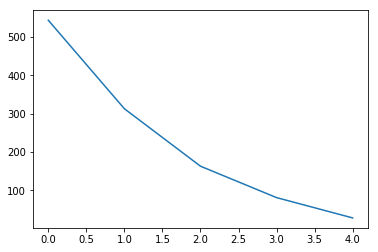

Real Percentage of gain: 83.07915628361732
Percentage of gain: 0.6304905852006859
Total gain: 712.4543612767751
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 90 202]
 [ 54 198]]
0.5294117647058824
Percentile:  1
[[ 22  52]
 [ 49 190]]
0.6773162939297125
Percentile:  2
[[  9  14]
 [ 24 116]]
0.7668711656441718
Percentile:  3
[[ 6 14]
 [ 3 58]]
0.7901234567901234
Percentile:  4
[[ 4  6]
 [ 0 18]]
0.7857142857142857
000000000000000000000000000000000000000000000000
Working on... FB
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5687789799072643
0.7676678445229682
F1,score 0.6499339498018494
G-score: 0.4866213189256314
Accuracy 0.5318021201413428
Window: 140
[[110 153]
 [377 492]]
Vol pos 3.2772347443756815
Vol neg 2.850994119744837


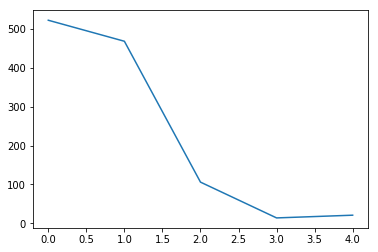

Real Percentage of gain: 35.12874148289143
Percentage of gain: 0.4080109829058275
Total gain: 461.8684326493967
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 74 138]
 [140 170]]
0.4674329501915709
Percentile:  1
[[ 23  14]
 [178 253]]
0.5897435897435898
Percentile:  2
[[13  0]
 [44 48]]
0.580952380952381
Percentile:  3
[[0 0]
 [8 6]]
0.42857142857142855
Percentile:  4
[[ 0  0]
 [ 6 15]]
0.7142857142857143
000000000000000000000000000000000000000000000000
Working on... INTC
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.592183705012144
0.6042402826855123
F1,score 0.5758064516129032
G-score: 0.538600464654753
Accuracy 0.5353356890459364
Window: 140
[[249 199]
 [327 357]]
Vol pos 2.364329893348264
Vol neg 2.2912609049514074


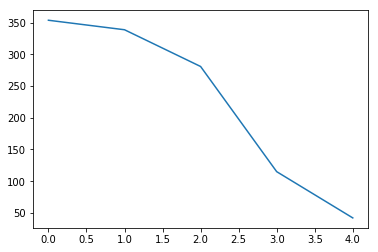

Real Percentage of gain: 40.256821794431104
Percentage of gain: 0.2010430029722683
Total gain: 227.5806793646077
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 76  40]
 [132 106]]
0.5141242937853108
Percentile:  1
[[ 72  42]
 [110 118]]
0.5555555555555556
Percentile:  2
[[69 58]
 [66 85]]
0.5539568345323741
Percentile:  3
[[17 46]
 [14 37]]
0.47368421052631576
Percentile:  4
[[15 13]
 [ 4 10]]
0.5952380952380952
000000000000000000000000000000000000000000000000
Working on... CSCO
6.455652128779988
0.0
Diff in tren train and test
0.6754775655264327
0.576
F1,score 0.6180505415162455
G-score: 0.4823139607514709
Accuracy 0.5297777777777778
Window: 140
[[168 309]
 [220 428]]
Vol pos 1.849728449086962
Vol neg 1.832472326115339


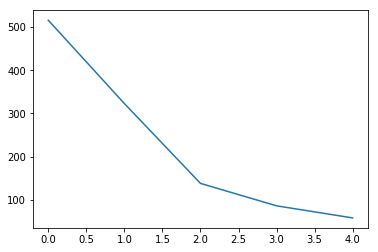

Real Percentage of gain: 14.580221300138284
Percentage of gain: 0.11827581790294668
Total gain: 133.06029514081501
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 54 166]
 [ 96 200]]
0.49224806201550386
Percentile:  1
[[ 39  57]
 [ 77 150]]
0.5851393188854489
Percentile:  2
[[23 27]
 [27 61]]
0.6086956521739131
Percentile:  3
[[28 30]
 [14 14]]
0.4883720930232558
Percentile:  4
[[23 29]
 [ 5  1]]
0.41379310344827586
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.63829787234043
0.0
Diff in tren train and test
0.45605123674911663
0.5229681978798587
F1,score 0.5307557117750439
G-score: 0.5288001793018131
Accuracy 0.5282685512367491
Window: 140
[[296 244]
 [290 302]]
Vol pos 2.9414648347325123
Vol neg 2.7622961817356604


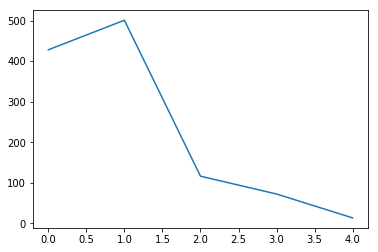

Real Percentage of gain: 71.9941991466514
Percentage of gain: 0.2508213870346288
Total gain: 283.9298101231998
000000000000000000000000000000000000000000000000
Percentile:  0
[[121 106]
 [ 79 122]]
0.5677570093457944
Percentile:  1
[[102  95]
 [177 127]]
0.45708582834331335
Percentile:  2
[[21 21]
 [32 42]]
0.5431034482758621
Percentile:  3
[[38 22]
 [ 2 10]]
0.6666666666666666
Percentile:  4
[[13]]
1.0
000000000000000000000000000000000000000000000000
Working on... NVDA
14.360220994475142
0.0
Diff in tren train and test
0.6489291234268051
0.5795053003533569
F1,score 0.6426931905126244
G-score: 0.5740533971034126
Accuracy 0.5874558303886925
Window: 140
[[245 231]
 [236 420]]
Vol pos 3.552871492663623
Vol neg 4.078609780055062


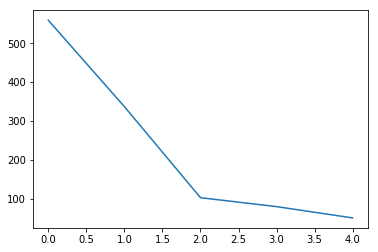

Real Percentage of gain: 264.5497865495264
Percentage of gain: 0.40454838810564986
Total gain: 457.94877533559566
000000000000000000000000000000000000000000000000
Percentile:  0
[[171 142]
 [ 81 165]]
0.6010733452593918
Percentile:  1
[[ 71  46]
 [ 74 146]]
0.6439169139465876
Percentile:  2
[[ 3 28]
 [21 51]]
0.5242718446601942
Percentile:  3
[[ 0 15]
 [26 39]]
0.4875
Percentile:  4
[[ 0  0]
 [33 18]]
0.35294117647058826
000000000000000000000000000000000000000000000000
Working on... NFLX
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6528268551236749
0.7376325088339223
F1,score 0.727707959305805
G-score: 0.41129636626309724
Accuracy 0.5980565371024735
Window: 140
[[ 69 228]
 [227 608]]
Vol pos 4.71062345808482
Vol neg 3.7802492585537313


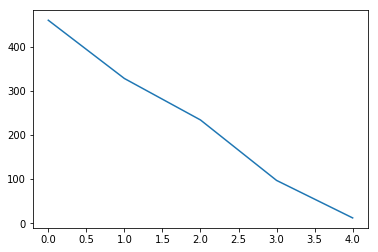

Real Percentage of gain: 224.92358389783928
Percentage of gain: 1.297772675336992
Total gain: 1469.078668481475
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 39 131]
 [ 71 219]]
0.5608695652173913
Percentile:  1
[[ 11  49]
 [ 95 173]]
0.5609756097560976
Percentile:  2
[[ 10  28]
 [ 50 145]]
0.6652360515021459
Percentile:  3
[[ 8 19]
 [11 59]]
0.6907216494845361
Percentile:  4
[[ 1  0]
 [ 0 11]]
1.0
000000000000000000000000000000000000000000000000
Working on... BKNG
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5771643663739021
0.6708542713567839
F1,score 0.739903069466882
G-score: 0.22886082341891342
Accuracy 0.5954773869346733
Window: 140
[[  8 123]
 [ 38 229]]
Vol pos 1.5645340108788857
Vol neg 0.616436900452054


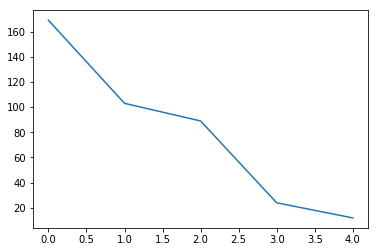

Real Percentage of gain: 191.7882836783357
Percentage of gain: 0.6822819588078272
Total gain: 271.5482196055152
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 7 90]
 [27 48]]
0.31976744186046513
Percentile:  1
[[ 0 26]
 [11 63]]
0.63
Percentile:  2
[[ 0  7]
 [ 0 82]]
0.9213483146067416
Percentile:  3
[[23]]
1.0
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
9.949148290880911
0.0
Diff in tren train and test
0.716024789729969
0.6563330380868024
F1,score 0.297029702970297
G-score: 0.3746250403601055
Accuracy 0.37112488928255094
Window: 140
[[269 119]
 [591 150]]
Vol pos 1.8482274698441967
Vol neg 3.0490517350252286


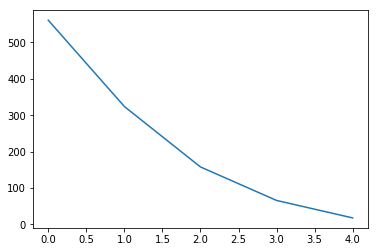

Real Percentage of gain: -163.53064983040844
Percentage of gain: -1.231549532332324
Total gain: -1390.4194220031939
000000000000000000000000000000000000000000000000
Percentile:  0
[[200  77]
 [209  75]]
0.49019607843137253
Percentile:  1
[[ 54   9]
 [206  55]]
0.33641975308641975
Percentile:  2
[[  6  19]
 [113  20]]
0.16455696202531644
Percentile:  3
[[ 9 14]
 [43  0]]
0.13636363636363635
Percentile:  4
[[ 0  0]
 [18  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AMGN
6.235840507476206
0.0
Diff in tren train and test
0.5342526690391459
0.7150489759572574
F1,score 0.7237256135934551
G-score: 0.4938720055923858
Accuracy 0.6090828138913624
Window: 140
[[109 211]
 [228 575]]
Vol pos 2.047455647243304
Vol neg 1.7501822160760614


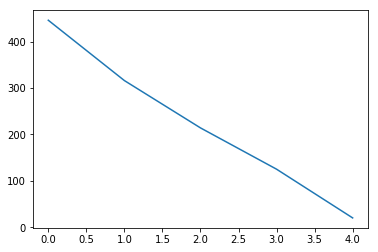

Real Percentage of gain: 80.77926093540827
Percentage of gain: 0.562893739854879
Total gain: 632.1296698570292
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 34 131]
 [ 86 195]]
0.5134529147982063
Percentile:  1
[[ 13  42]
 [ 59 202]]
0.680379746835443
Percentile:  2
[[ 22   4]
 [ 47 141]]
0.7616822429906542
Percentile:  3
[[27 29]
 [33 36]]
0.504
Percentile:  4
[[12  5]
 [ 3  0]]
0.6
000000000000000000000000000000000000000000000000
Working on... TXN
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6905918727915195
0.6746242263483643
F1,score 0.6427118644067796
G-score: 0.4684623241135936
Accuracy 0.5340406719717065
Window: 140
[[130 238]
 [289 474]]
Vol pos 2.7168627748712364
Vol neg 2.242532802540758


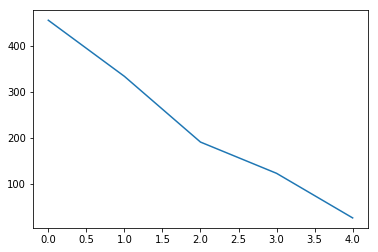

Real Percentage of gain: 37.00747636150421
Percentage of gain: 0.40598614419385254
Total gain: 459.1703290832472
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 80 128]
 [ 98 149]]
0.5032967032967033
Percentile:  1
[[ 50  79]
 [ 92 113]]
0.4880239520958084
Percentile:  2
[[  0  14]
 [ 78 100]]
0.5208333333333334
Percentile:  3
[[ 0 10]
 [21 91]]
0.7459016393442623
Percentile:  4
[[ 0  7]
 [ 0 19]]
0.7307692307692307
000000000000000000000000000000000000000000000000
Working on... AVGO
10.183057294555825
0.0
Diff in tren train and test
0.5048802129547472
0.639751552795031
F1,score 0.48050770625566636
G-score: 0.5114947838500769
Accuracy 0.49157054125998223
Window: 140
[[289 117]
 [456 265]]
Vol pos 3.256688654679462
Vol neg 3.1489836421489366


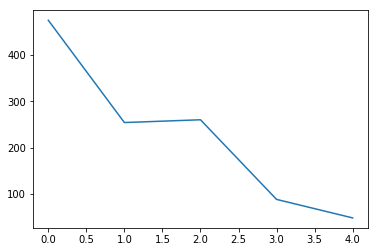

Real Percentage of gain: -56.50991280588266
Percentage of gain: -0.00014384406292705963
Total gain: -0.16211225891879621
000000000000000000000000000000000000000000000000
Percentile:  0
[[137  64]
 [192  82]]
0.4610526315789474
Percentile:  1
[[82 22]
 [76 74]]
0.6141732283464567
Percentile:  2
[[ 23  15]
 [139  83]]
0.4076923076923077
Percentile:  3
[[10 15]
 [43 20]]
0.3409090909090909
Percentile:  4
[[36  1]
 [ 6  5]]
0.8541666666666666
000000000000000000000000000000000000000000000000
Working on... PYPL
12.136266855926186
0.0
Diff in tren train and test
0.7039823008849557
0.7183348095659876
F1,score 0.5589080459770115
G-score: 0.4359494018532425
Accuracy 0.4561558901682905
Window: 140
[[126 192]
 [422 389]]
Vol pos 2.3433652214895146
Vol neg 3.3850742383062116


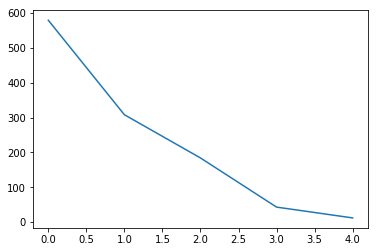

Real Percentage of gain: -35.77614848236265
Percentage of gain: -0.7720128372479309
Total gain: -871.602493252914
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 54  80]
 [193 252]]
0.5284974093264249
Percentile:  1
[[ 32  19]
 [146 111]]
0.4642857142857143
Percentile:  2
[[33 87]
 [42 22]]
0.29891304347826086
Percentile:  3
[[ 7  6]
 [28  2]]
0.20930232558139536
Percentile:  4
[[ 0  0]
 [12  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... GILD
12.867944909532813
0.0
Diff in tren train and test
0.4787422497785651
0.48404255319148937
F1,score 0.49369369369369365
G-score: 0.5017748542477233
Accuracy 0.50177304964539
Window: 140
[[292 290]
 [272 274]]
Vol pos 3.458910041182019
Vol neg 3.0172704802650196


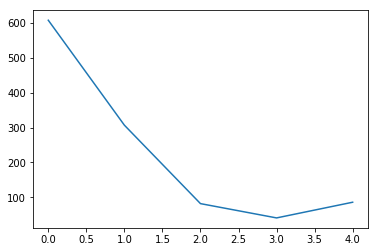

Real Percentage of gain: -18.430176653204704
Percentage of gain: 0.23230237003553342
Total gain: 262.0370734000817
000000000000000000000000000000000000000000000000
Percentile:  0
[[173 166]
 [147 122]]
0.48519736842105265
Percentile:  1
[[ 43  60]
 [102 102]]
0.4723127035830619
Percentile:  2
[[ 7  5]
 [21 49]]
0.6829268292682927
Percentile:  3
[[20 21]
 [ 0  0]]
0.4878048780487805
Percentile:  4
[[49 37]
 [ 0  0]]
0.5697674418604651
000000000000000000000000000000000000000000000000
Working on... COST
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6553559547571524
0.6583850931677019
F1,score 0.5941536369816451
G-score: 0.3771810588569233
Accuracy 0.4702750665483585
Window: 140
[[ 93 292]
 [305 437]]
Vol pos 1.4659315797595618
Vol neg 1.3182947772916174


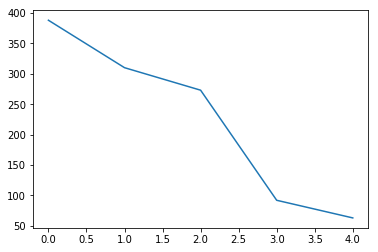

Real Percentage of gain: -0.8614619503694173
Percentage of gain: -0.008942541943680406
Total gain: -10.078244770527817
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 59 141]
 [ 84 103]]
0.4186046511627907
Percentile:  1
[[ 24  80]
 [ 76 130]]
0.4967741935483871
Percentile:  2
[[  9  59]
 [ 90 115]]
0.4542124542124542
Percentile:  3
[[ 0 12]
 [27 53]]
0.5760869565217391
Percentile:  4
[[ 0  0]
 [27 36]]
0.5714285714285714
000000000000000000000000000000000000000000000000
Working on... QCOM
11.725006748852696
0.0
Diff in tren train and test
0.47791519434628976
0.6861184792219275
F1,score 0.5478806907378336
G-score: 0.510859279476008
Accuracy 0.4907161803713528
Window: 140
[[206 149]
 [427 349]]
Vol pos 3.533112224826346
Vol neg 3.1770521543827415


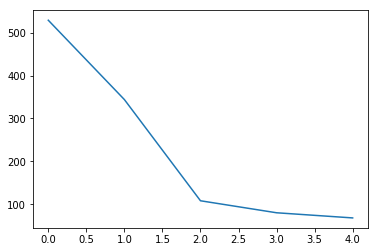

Real Percentage of gain: -2.084386281588554
Percentage of gain: 0.11573407944665146
Total gain: 130.8952438541628
000000000000000000000000000000000000000000000000
Percentile:  0
[[133  97]
 [180 119]]
0.4763705103969754
Percentile:  1
[[ 25  23]
 [157 139]]
0.47674418604651164
Percentile:  2
[[11  7]
 [53 37]]
0.4444444444444444
Percentile:  3
[[12  0]
 [24 44]]
0.7
Percentile:  4
[[25 21]
 [12 10]]
0.5147058823529411
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.5278047268256868
Mean gain over portfolio :  135.71410432763898
Real mean gain over portfolio 44.05803959691412


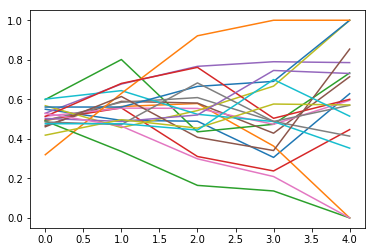

In [7]:
import warnings
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    #senttemp=normalize(senttemp,axis=0,norm='max')
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        yprice=[]
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(senttemp[i])
        y=np.array(y)
        
        x=np.array(x)
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()

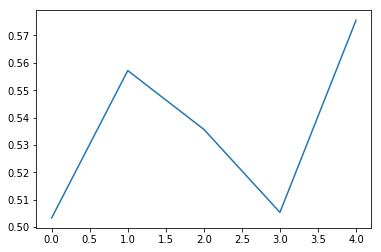

In [8]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
15.270476249727803
0.0052039966694373985
Diff in tren train and test
0.5556300268096515
0.6091234347048301
F1,score 0.5885841363973313
G-score: 0.4705816877047017
Accuracy 0.5035778175313059
Window: 200
[[166 271]
 [284 397]]
Vol pos 4.161653732662633
Vol neg 4.259133209508749


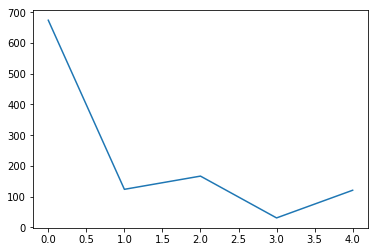

Real Percentage of gain: -13.945819914774225
Percentage of gain: -0.018611699273965224
Total gain: -20.80787978829312
000000000000000000000000000000000000000000000000
Percentile:  0
[[126 153]
 [160 234]]
0.5349182763744428
Percentile:  1
[[23 46]
 [24 31]]
0.43548387096774194
Percentile:  2
[[17 64]
 [37 49]]
0.39520958083832336
Percentile:  3
[[ 0  8]
 [ 7 16]]
0.5161290322580645
Percentile:  4
[[ 0  0]
 [55 66]]
0.5454545454545454
000000000000000000000000000000000000000000000000
Working on... AMZN
11.321930760535398
0.0025179720253285087
Diff in tren train and test
0.7125
0.8303571428571429
F1,score 0.7064615384615385
G-score: 0.47343702284571987
Accuracy 0.5741071428571428
Window: 200
[[ 69 121]
 [356 574]]
Vol pos 3.0609680762882556
Vol neg 2.6352799604989308


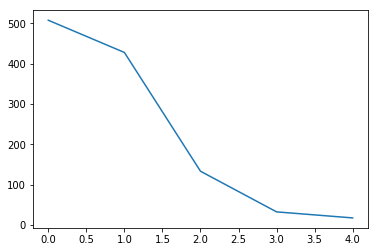

Real Percentage of gain: 117.32466690877519
Percentage of gain: 0.6349767249065699
Total gain: 711.1739318953582
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 69 119]
 [126 194]]
0.5177165354330708
Percentile:  1
[[  0   2]
 [168 258]]
0.602803738317757
Percentile:  2
[[ 0  0]
 [44 89]]
0.6691729323308271
Percentile:  3
[[ 0  0]
 [12 20]]
0.625
Percentile:  4
[[ 0  0]
 [ 5 12]]
0.7058823529411765
000000000000000000000000000000000000000000000000
Working on... PEP
7.1599283011352295
0.0
Diff in tren train and test
0.31000781860828774
0.9765258215962441
F1,score 0.6833333333333332
G-score: 0.49527683703071085
Accuracy 0.5242566510172144
Window: 200
[[  7   8]
 [296 328]]
Vol pos 2.5632729791372655
Vol neg 2.8787650052066773


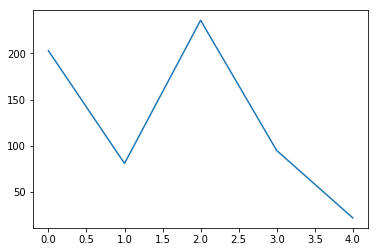

Real Percentage of gain: -0.6133139446408006
Percentage of gain: -0.025740396826050203
Total gain: -16.44811357184608
000000000000000000000000000000000000000000000000
Percentile:  0
[[  7   8]
 [ 72 116]]
0.6059113300492611
Percentile:  1
[[ 0  0]
 [14 67]]
0.8271604938271605
Percentile:  2
[[  0   0]
 [162  74]]
0.3135593220338983
Percentile:  3
[[ 0  0]
 [42 53]]
0.5578947368421052
Percentile:  4
[[ 0  0]
 [ 5 17]]
0.7727272727272727
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.972699216586207
0.0019559137050855525
Diff in tren train and test
0.6362823949955317
0.6574239713774598
F1,score 0.6941255908170155
G-score: 0.5250818136216987
Accuracy 0.5948121645796064
Window: 200
[[151 232]
 [221 514]]
Vol pos 3.4534884341008576
Vol neg 3.4104633298717095


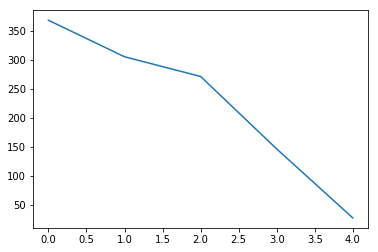

Real Percentage of gain: 118.98665822311152
Percentage of gain: 0.6722986764268211
Total gain: 751.629920245186
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 74 107]
 [ 46 140]]
0.5831062670299727
Percentile:  1
[[ 38  62]
 [ 49 156]]
0.6360655737704918
Percentile:  2
[[ 30  62]
 [ 70 109]]
0.5129151291512916
Percentile:  3
[[ 9  1]
 [41 95]]
0.7123287671232876
Percentile:  4
[[ 0  0]
 [14 13]]
0.48148148148148145
000000000000000000000000000000000000000000000000
Working on... MSFT
5.8924023311029625
0.0
Diff in tren train and test
0.6748603351955307
0.6851520572450805
F1,score 0.4408352668213457
G-score: 0.34098325801339696
Accuracy 0.35330948121645794
Window: 200
[[110 242]
 [481 285]]
Vol pos 1.6436047244759393
Vol neg 1.9069179892773123


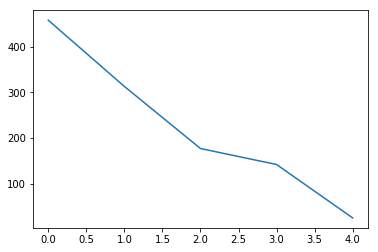

Real Percentage of gain: -121.72542451352876
Percentage of gain: -0.6524846512339005
Total gain: -729.4778400795008
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 82 122]
 [150 104]]
0.40611353711790393
Percentile:  1
[[ 21 103]
 [107  82]]
0.329073482428115
Percentile:  2
[[  7  16]
 [107  47]]
0.3050847457627119
Percentile:  3
[[  0   1]
 [103  38]]
0.2676056338028169
Percentile:  4
[[ 0  0]
 [14 11]]
0.44
000000000000000000000000000000000000000000000000
Working on... FB
12.336073288573756
0.010328444536258126
Diff in tren train and test
0.5438518187904485
0.8696428571428572
F1,score 0.7229056824838898
G-score: 0.3607840280629774
Accuracy 0.5776785714285714
Window: 200
[[ 30 116]
 [357 617]]
Vol pos 3.6133816127309384
Vol neg 3.4512543972238494


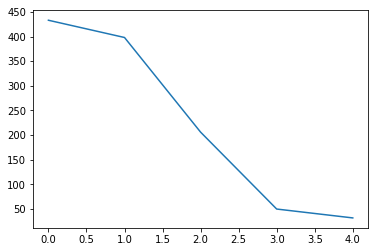

Real Percentage of gain: 55.41725342887272
Percentage of gain: 0.6298344406696754
Total gain: 705.4145735500365
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 19  90]
 [123 202]]
0.5092165898617511
Percentile:  1
[[ 11  25]
 [110 251]]
0.6599496221662469
Percentile:  2
[[  0   1]
 [ 86 119]]
0.5776699029126213
Percentile:  3
[[ 0  0]
 [15 34]]
0.6938775510204082
Percentile:  4
[[ 0  0]
 [22 10]]
0.3125
000000000000000000000000000000000000000000000000
Working on... INTC
7.207444473707307
0.0
Diff in tren train and test
0.6317786208435617
0.5767857142857142
F1,score 0.44115226337448554
G-score: 0.3891213130525833
Accuracy 0.39375
Window: 200
[[173 301]
 [378 268]]
Vol pos 2.4622343220750507
Vol neg 2.421848186761608


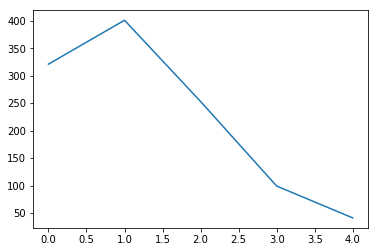

Real Percentage of gain: -86.37699086822752
Percentage of gain: -0.49874069890717393
Total gain: -558.5895827760348
000000000000000000000000000000000000000000000000
Percentile:  0
[[72 98]
 [93 58]]
0.40498442367601245
Percentile:  1
[[ 61 110]
 [147  83]]
0.35910224438902744
Percentile:  2
[[ 31  54]
 [103  65]]
0.3794466403162055
Percentile:  3
[[ 9 13]
 [26 51]]
0.6060606060606061
Percentile:  4
[[ 0 25]
 [ 8  8]]
0.1951219512195122
000000000000000000000000000000000000000000000000
Working on... CSCO
6.408313487767918
0.011134617525877858
Diff in tren train and test
0.7121688370004491
0.5992812219227314
F1,score 0.6126126126126127
G-score: 0.5091322850085247
Accuracy 0.5363881401617251
Window: 200
[[189 257]
 [259 408]]
Vol pos 2.197538604728784
Vol neg 2.168700273824976


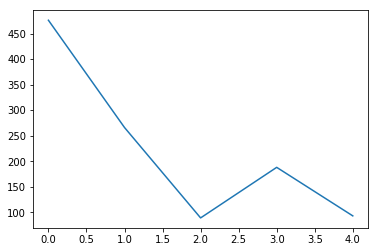

Real Percentage of gain: 15.353262919652968
Percentage of gain: 0.17329847774429152
Total gain: 192.88120572939647
000000000000000000000000000000000000000000000000
Percentile:  0
[[106  97]
 [145 131]]
0.49478079331941544
Percentile:  1
[[ 22  17]
 [ 88 135]]
0.5992366412213741
Percentile:  2
[[ 3 10]
 [ 7 72]]
0.8152173913043478
Percentile:  3
[[25 89]
 [16 58]]
0.44148936170212766
Percentile:  4
[[32 44]
 [ 2 12]]
0.4888888888888889
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.116774878445044
0.0
Diff in tren train and test
0.44776785714285716
0.5348214285714286
F1,score 0.5320786997433705
G-score: 0.5109737234276694
Accuracy 0.5116071428571428
Window: 200
[[262 259]
 [288 311]]
Vol pos 3.455844747548432
Vol neg 3.2865851448855135


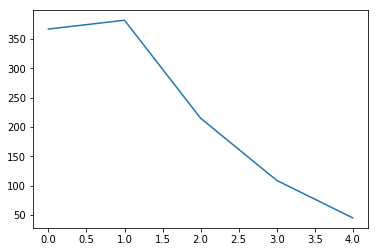

Real Percentage of gain: -100.69802003931144
Percentage of gain: 0.1628901482972103
Total gain: 182.43696609287554
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 76  62]
 [111 118]]
0.5286103542234333
Percentile:  1
[[ 91  72]
 [127  92]]
0.4790575916230366
Percentile:  2
[[55 80]
 [39 41]]
0.44651162790697674
Percentile:  3
[[37 29]
 [ 8 35]]
0.6605504587155964
Percentile:  4
[[ 3 16]
 [ 2 24]]
0.6
000000000000000000000000000000000000000000000000
Working on... NVDA
16.150883867675034
0.0019193489568320964
Diff in tren train and test
0.6511939299263557
0.6419642857142858
F1,score 0.6131284916201117
G-score: 0.4397415360450192
Accuracy 0.5053571428571428
Window: 200
[[127 274]
 [280 439]]
Vol pos 4.727996152842032
Vol neg 4.623062571200684


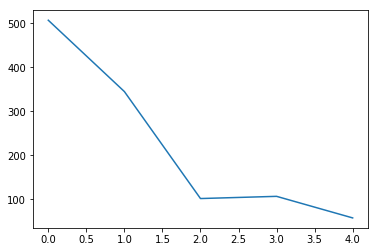

Real Percentage of gain: 100.67142238445837
Percentage of gain: 0.10256174827090254
Total gain: 114.86915806341085
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 64 149]
 [ 97 196]]
0.5138339920948617
Percentile:  1
[[ 60 109]
 [ 73 103]]
0.47246376811594204
Percentile:  2
[[ 3 16]
 [31 52]]
0.5392156862745098
Percentile:  3
[[ 0  0]
 [50 57]]
0.5327102803738317
Percentile:  4
[[ 0  0]
 [28 30]]
0.5172413793103449
000000000000000000000000000000000000000000000000
Working on... NFLX
16.219868718627612
0.0
Diff in tren train and test
0.6252232142857143
0.7955357142857142
F1,score 0.6442048517520215
G-score: 0.5167848587281704
Accuracy 0.5285714285714286
Window: 200
[[114 115]
 [413 478]]
Vol pos 5.5929745012942895
Vol neg 5.071022061618459


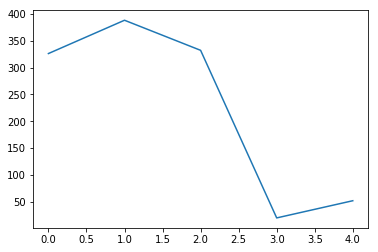

Real Percentage of gain: 7.347803934804092
Percentage of gain: 0.5656618359211365
Total gain: 633.5412562316728
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 50  38]
 [105 133]]
0.5613496932515337
Percentile:  1
[[ 44  55]
 [148 141]]
0.47680412371134023
Percentile:  2
[[ 20  22]
 [135 155]]
0.5271084337349398
Percentile:  3
[[ 0  0]
 [19  1]]
0.05
Percentile:  4
[[ 0  0]
 [ 6 46]]
0.8846153846153846
000000000000000000000000000000000000000000000000
Working on... BKNG
4.336126439130737
0.0018669255470074874
Diff in tren train and test
0.5258732212160414
0.7046632124352331
F1,score 0.8244274809160306
G-score: 0.09331361283626989
Accuracy 0.7020725388601037
Window: 200
[[  1 113]
 [  2 270]]
Vol pos 1.8901849432662092
Vol neg 0.5048339123159262


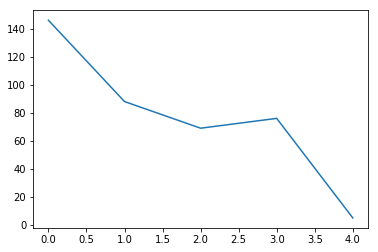

Real Percentage of gain: 243.3028282980917
Percentage of gain: 1.1766430562404435
Total gain: 454.1842197088112
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 1 99]
 [ 2 44]]
0.3082191780821918
Percentile:  1
[[ 0 12]
 [ 0 76]]
0.8636363636363636
Percentile:  2
[[ 0  1]
 [ 0 68]]
0.9855072463768116
Percentile:  3
[[76]]
1.0
Percentile:  4
[[5]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
9.848536613142013
0.002086767805344401
Diff in tren train and test
0.7138702460850112
0.7242614145031334
F1,score 0.4467741935483871
G-score: 0.4137620223326997
Accuracy 0.38585496866606983
Window: 200
[[154 154]
 [532 277]]
Vol pos 2.445323196320895
Vol neg 3.663971009989651


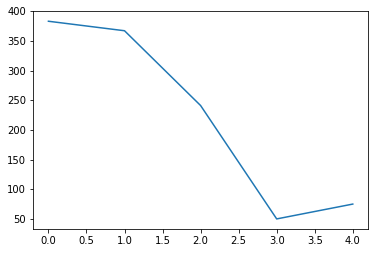

Real Percentage of gain: -80.85242438059068
Percentage of gain: -1.3066694854418934
Total gain: -1459.5498152385949
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 83  57]
 [139 104]]
0.48825065274151436
Percentile:  1
[[ 57  67]
 [151  92]]
0.40599455040871935
Percentile:  2
[[ 13  30]
 [121  76]]
0.37083333333333335
Percentile:  3
[[ 0  0]
 [45  5]]
0.1
Percentile:  4
[[ 0  0]
 [75  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AMGN
5.841163444850075
0.007105975040131699
Diff in tren train and test
0.5184352517985612
0.7821782178217822
F1,score 0.626746506986028
G-score: 0.4206359894401828
Accuracy 0.49504950495049505
Window: 200
[[ 79 163]
 [398 471]]
Vol pos 2.625971782742705
Vol neg 2.142778982548926


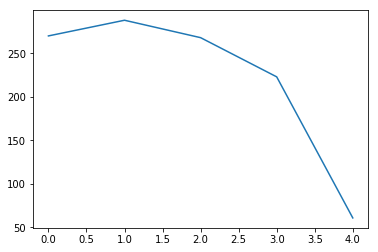

Real Percentage of gain: -7.695245657986762
Percentage of gain: 0.21798872304099035
Total gain: 242.18547129854028
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 13  40]
 [112 108]]
0.4432234432234432
Percentile:  1
[[  9  34]
 [138 107]]
0.4027777777777778
Percentile:  2
[[ 13  50]
 [ 88 115]]
0.48120300751879697
Percentile:  3
[[ 30  38]
 [ 48 105]]
0.6108597285067874
Percentile:  4
[[14  1]
 [12 34]]
0.7868852459016393
000000000000000000000000000000000000000000000000
Working on... TXN
9.594205774382367
0.0
Diff in tren train and test
0.6787946428571429
0.7211796246648794
F1,score 0.7700797057020233
G-score: 0.537891587552111
Accuracy 0.6648793565683646
Window: 200
[[116 196]
 [179 628]]
Vol pos 3.01123003960065
Vol neg 3.3270562049908796


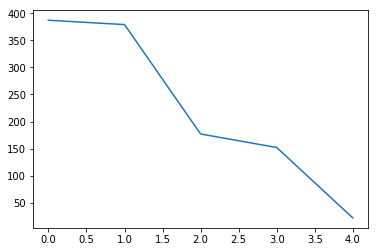

Real Percentage of gain: 267.03818808180023
Percentage of gain: 0.8871394750592527
Total gain: 992.7090725913038
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 39 115]
 [  6 227]]
0.6873385012919897
Percentile:  1
[[ 77  66]
 [ 57 179]]
0.6754617414248021
Percentile:  2
[[  0  15]
 [ 37 125]]
0.7062146892655368
Percentile:  3
[[ 0  0]
 [70 82]]
0.5394736842105263
Percentile:  4
[[ 0  0]
 [ 9 13]]
0.5909090909090909
000000000000000000000000000000000000000000000000
Working on... AVGO
9.981040657257227
0.0025934464021118834
Diff in tren train and test
0.4697309417040359
0.6932735426008969
F1,score 0.44302643573381956
G-score: 0.48980204098649
Accuracy 0.45201793721973094
Window: 200
[[261  81]
 [530 243]]
Vol pos 4.528773122279006
Vol neg 3.749147592739569


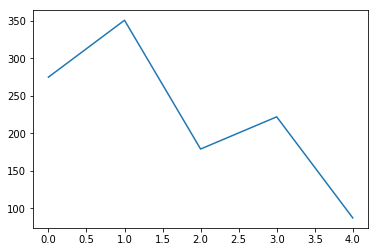

Real Percentage of gain: -61.37994937115772
Percentage of gain: -0.00737894666839272
Total gain: -8.227525535257882
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 53  38]
 [125  58]]
0.4051094890510949
Percentile:  1
[[ 75  25]
 [194  58]]
0.3778409090909091
Percentile:  2
[[34  7]
 [99 38]]
0.4044943820224719
Percentile:  3
[[65  9]
 [82 66]]
0.5900900900900901
Percentile:  4
[[34  2]
 [29 22]]
0.6436781609195402
000000000000000000000000000000000000000000000000
Working on... PYPL
11.940298507462696
0.005534927156825336
Diff in tren train and test
0.7345706618962433
0.7493285586392122
F1,score 0.6944099378881987
G-score: 0.39676753290360167
Accuracy 0.5595344673231871
Window: 200
[[ 66 214]
 [278 559]]
Vol pos 3.4938016602796145
Vol neg 4.1395033171450315


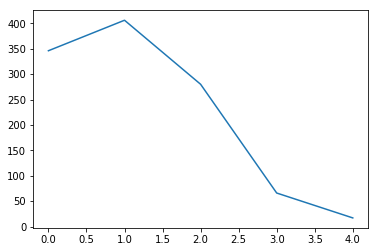

Real Percentage of gain: 89.48588323762644
Percentage of gain: 0.13159391731370068
Total gain: 146.99040563940366
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 30  41]
 [ 55 222]]
0.7241379310344828
Percentile:  1
[[ 13  68]
 [153 170]]
0.452970297029703
Percentile:  2
[[ 22  53]
 [ 69 135]]
0.5627240143369175
Percentile:  3
[[ 1 48]
 [ 0 17]]
0.2727272727272727
Percentile:  4
[[ 0  4]
 [ 1 13]]
0.7222222222222222
000000000000000000000000000000000000000000000000
Working on... GILD
12.784895482130821
0.0
Diff in tren train and test
0.477170993733214
0.48566308243727596
F1,score 0.5598526703499079
G-score: 0.571287123936374
Accuracy 0.5716845878136201
Window: 200
[[334 240]
 [238 304]]
Vol pos 4.196265632044434
Vol neg 4.152290847853924


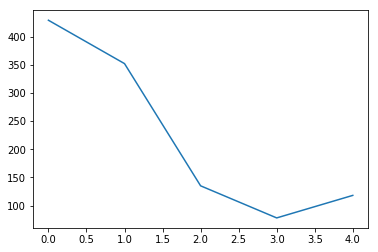

Real Percentage of gain: 181.84713865765522
Percentage of gain: 0.6204502221954955
Total gain: 692.4224479701729
000000000000000000000000000000000000000000000000
Percentile:  0
[[153  99]
 [ 60 117]]
0.6293706293706294
Percentile:  1
[[ 58  64]
 [131  99]]
0.4460227272727273
Percentile:  2
[[ 2  1]
 [46 86]]
0.6518518518518519
Percentile:  3
[[49 29]
 [ 0  0]]
0.6282051282051282
Percentile:  4
[[72 46]
 [ 0  0]]
0.6101694915254238
000000000000000000000000000000000000000000000000
Working on... COST
5.257825954817153
0.0
Diff in tren train and test
0.675857431069267
0.7031390134529149
F1,score 0.4342948717948718
G-score: 0.3796226883834567
Accuracy 0.3668161434977579
Window: 200
[[138 193]
 [513 271]]
Vol pos 1.2080496396692633
Vol neg 1.8282441353970504


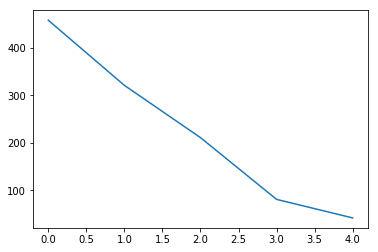

Real Percentage of gain: -215.55977410615472
Percentage of gain: -0.7144825623009766
Total gain: -796.6480569655889
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 91 147]
 [108 112]]
0.4432314410480349
Percentile:  1
[[ 47  41]
 [139  94]]
0.4392523364485981
Percentile:  2
[[  0   5]
 [149  57]]
0.27014218009478674
Percentile:  3
[[ 0  0]
 [74  7]]
0.08641975308641975
Percentile:  4
[[ 0  0]
 [41  1]]
0.023809523809523808
000000000000000000000000000000000000000000000000
Working on... QCOM
15.039417828987261
0.008409014463509178
Diff in tren train and test
0.4767857142857143
0.7256478999106345
F1,score 0.48661417322834644
G-score: 0.44254820221294694
Accuracy 0.41733690795352996
Window: 200
[[158 149]
 [503 309]]
Vol pos 4.356439831490233
Vol neg 4.726042404069272


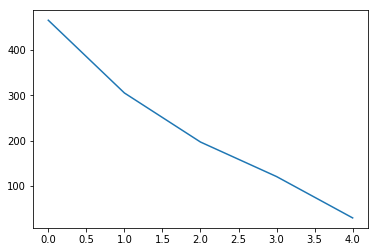

Real Percentage of gain: -57.23962093862821
Percentage of gain: -0.9355873513380037
Total gain: -1046.9222461472261
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 57  72]
 [206 132]]
0.40471092077087795
Percentile:  1
[[ 42  29]
 [132  99]]
0.46688741721854304
Percentile:  2
[[25 21]
 [91 60]]
0.43147208121827413
Percentile:  3
[[34 25]
 [47 15]]
0.4049586776859504
Percentile:  4
[[ 0  2]
 [27  1]]
0.03333333333333333
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.5109331047965299
Mean gain over portfolio :  59.188378445691264
Real mean gain over portfolio 22.534426116992385


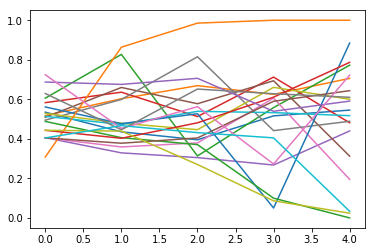

In [9]:
import warnings
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    #senttemp=normalize(senttemp,axis=0,norm='max')
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[200]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        yprice=[]
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(senttemp[i])
        y=np.array(y)
        
        x=np.array(x)
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

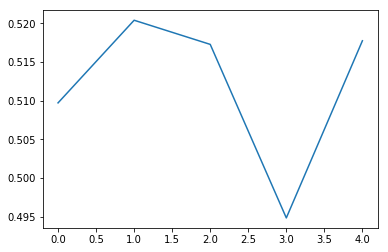

In [10]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

In [11]:
tempacc=aucresults

In [12]:
import operator
t=[0,0,0,0,0,0,0,0,0]
for i in range(0,len(tempacc)):
    #for k in range(0,len(tempacc[i])):
        #print(tempacc[i][k])
        #if(tempacc[i][k]<0.5):
           #tempacc[i][k]=1-tempacc[i][k]
    t=np.add(t,tempacc[i])
    plt.plot(tempacc[i])
print(t/len(tempacc))
plt.show()

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [ ]:
meanvalue=[]
for i in range(0,len(tempacc)):
    meanvalue.append(np.mean(tempacc[i]))
top10=np.argsort(meanvalue)[-15:]
for i in range(0,len(top10)):
    print(files[top10[i]])
    #print(tempacc[top10[i]])
    print(meanvalue[top10[i]])
    plt.plot(prices[top10[i]].iloc[3600:]['close'])
    plt.show()

In [ ]:
tempacc=f1stocksresults

In [ ]:
import operator
t=[0,0,0,0,0,0,0,0,0]
for i in range(0,len(tempacc)):
    for k in range(0,len(tempacc[i])):
        #print(tempacc[i][k])
        if(tempacc[i][k]<0.5):
           tempacc[i][k]=1-tempacc[i][k]
    t=np.add(t,tempacc[i])
    plt.plot(tempacc[i])
print(t/len(tempacc))
plt.show()